In [152]:
%reload_ext autoreload
%autoreload 2

# %gui qt

import time
from tqdm import tqdm
from pathlib import Path
import numpy as np
import numba as nb
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

import vrExperiment as vre
import vrFunctions as vrf
import vrAnalysis as vra
import basicFunctions as bf
import fileManagement as fm
import dbManagement as dbm

# import redCellGUI as rgui

In [6]:
# Immediate next steps for programming work:
# - ROICaT index alignment tools

In [2]:
mouseName = 'CR_Hippocannula6'
dateString = '2022-09-05'
session = '701'
# vrExperiment registration and preprocessing 
# vrReg = vre.vrExperimentRegistration(mouseName, dateString, session, oasis=False, imaging=True)
# vrReg.processTimeline()
# vrReg.processImaging()
# vrReg.processRedCells()
# vrReg.saveParams()
# print(vrReg.sessionPath())
# del vrReg

In [2]:
mouseName = 'ATL020'
dateString = '2023-05-04'
session = '702'

In [15]:
# # vrExperiment registration and preprocessing 
# vrReg = vre.vrExperimentRegistration(mouseName, dateString, session, oasis=False, imaging=True)
# vrReg.doPreprocessing()
# vrReg.saveParams()
# print(vrReg.sessionPath())
# del vrReg

In session: ATL020/2023-05-04/702, vrFile['rigInfo'] does not exist. Assuming default settings for B2!
Self.value['numTrials'] set by trialInfo.trialIdx>0, but this might not be right. There might be smarter ways to determine which trials are 'good' trials...
frame2time had 2 more than suite2p output. This happens sometimes. I don't like it. I think it's because scanimage sends a TTL before starting the frame
Computing red cell features for ATL020/2023-05-04/702... (usually takes 10-20 seconds)
Facecam preprocessing has not been coded yet!
C:\Users\andrew\Documents\localData\ATL020\2023-05-04\702


In [3]:
# Load registered vrExperiment
vrexp = vre.vrExperiment(mouseName, dateString, session)

In [6]:
%%time
speedThreshold = 5
omap, smap, lickmap, distvec = vrf.getBehaviorMaps(vrexp,speedThreshold=speedThreshold) # produce smoothed occupancy and speed maps, along with the distance bins used to create them
frameTrialIdx, framePosition, frameSpeed = vrexp.getFrameBehavior() # convert behavioral data into timeframe of spiking data
spkmap = vrf.getSpikeMap(vrexp, frameTrialIdx, framePosition, frameSpeed, distvec, omap, speedThreshold=speedThreshold, standardizeSpks=False, doSmoothing=0) # produce the spkmap 
idxFullTrials = np.all(~np.isnan(omap),axis=1) # find out which trials the mouse explored the whole environment
relmse, relcor = vrf.measureReliability(spkmap[:,idxFullTrials], numcv=3) # measure reliability of spiking
spInfo = vrf.measureSpatialInformation(omap[idxFullTrials], spkmap[:,idxFullTrials]) # measure spatial information of spiking

CPU times: total: 1.5 s
Wall time: 976 ms


In [9]:
# Code block for opening redSelectionGUI for a vrExperiment
vrexp = vre.vrExperiment(mouseName, dateString, session)
redCell = vre.redCellProcessing(vrexp)
redSelection = rgui.redSelectionGUI(redCell)

C:\Users\andrew\miniconda3\envs\vrAnalysis\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\andrew\miniconda3\envs\vrAnalysis\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


ATL012_2023-01-18_701
ATL012_2023-01-20_701
ATL012_2023-01-20_702
ATL012_2023-01-23_701
ATL012_2023-01-24_703
ATL012_2023-01-25_701
ATL012_2023-01-26_702
ATL012_2023-01-27_701
ATL012_2023-01-30_702
ATL012_2023-02-01_701
ATL012_2023-02-02_701
ATL012_2023-02-06_701
ATL012_2023-02-07_701
ATL012_2023-02-08_702
ATL012_2023-02-09_701
ATL012_2023-02-14_703
ATL012_2023-02-15_701
ATL012_2023-02-16_701
ATL012_2023-02-20_701
ATL012_2023-02-21_702


C:\Users\andrew\Documents\GitHub\vrAnalysis\vrAnalysis.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(1,2,figsize=(12,4))


ATL012_2023-02-22_701
ATL012_2023-02-27_701
ATL012_2023-02-28_701
ATL012_2023-03-01_701
ATL012_2023-03-03_701
ATL020_2023-03-22_701
ATL020_2023-03-24_701
ATL020_2023-03-27_701
ATL020_2023-03-29_701
ATL020_2023-03-31_701
ATL020_2023-04-04_701
ATL020_2023-04-05_701
ATL020_2023-04-06_701
ATL020_2023-04-11_701
ATL020_2023-05-03_701
ATL020_2023-05-04_702
ATL022_2023-03-24_701
ATL022_2023-03-27_701
ATL022_2023-03-29_701
ATL022_2023-03-31_703
ATL022_2023-04-04_701
ATL022_2023-04-05_702
ATL022_2023-04-06_701
ATL022_2023-04-11_701
ATL022_2023-04-12_701
ATL022_2023-04-18_701
ATL022_2023-04-19_701
ATL022_2023-04-21_701
ATL022_2023-04-24_701
ATL022_2023-04-25_702
ATL022_2023-04-26_701
ATL022_2023-04-27_702
ATL022_2023-04-28_701
ATL022_2023-05-03_701
ATL022_2023-05-04_701
ATL023_2023-04-28_702
ATL023_2023-05-03_701
ATL023_2023-05-04_701
ATL027_2023-07-19_701
ATL027_2023-07-20_701
ATL027_2023-07-21_701
ATL027_2023-07-24_701
ATL027_2023-07-25_701
ATL027_2023-07-26_701
ATL027_2023-07-27_701
ATL027_202

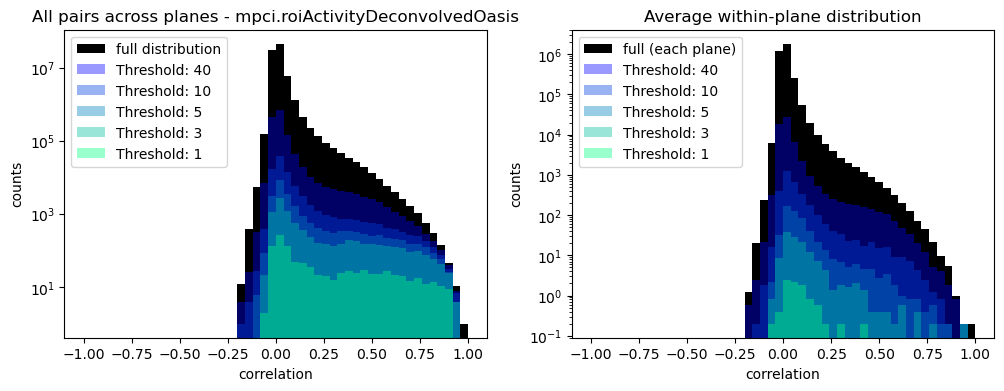

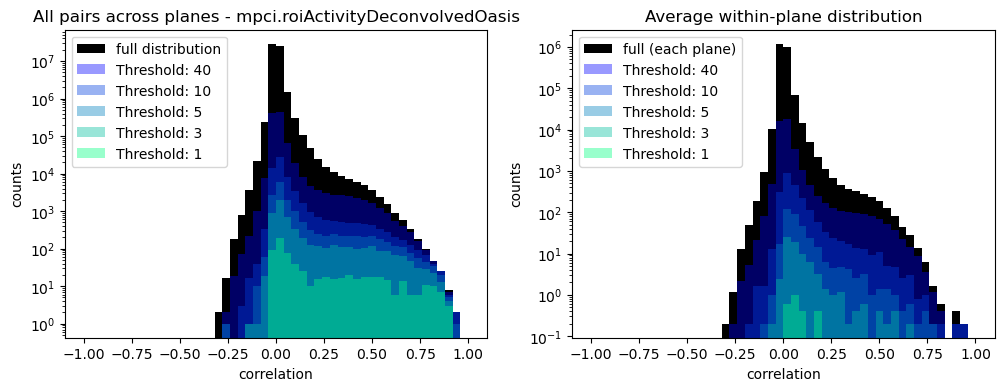

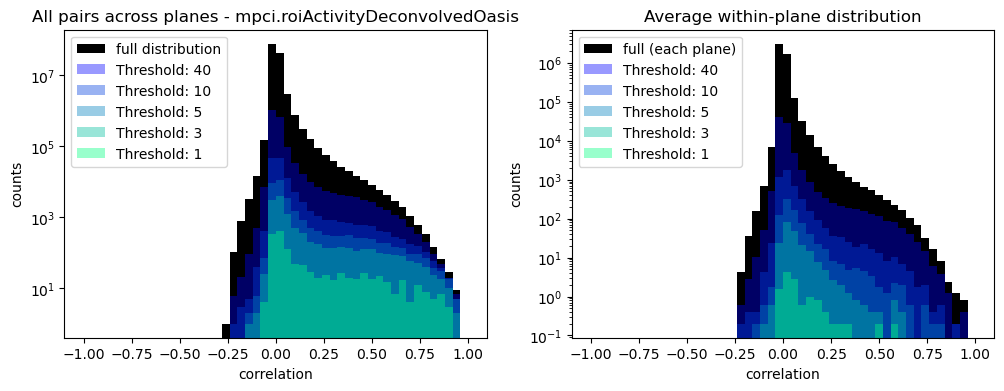

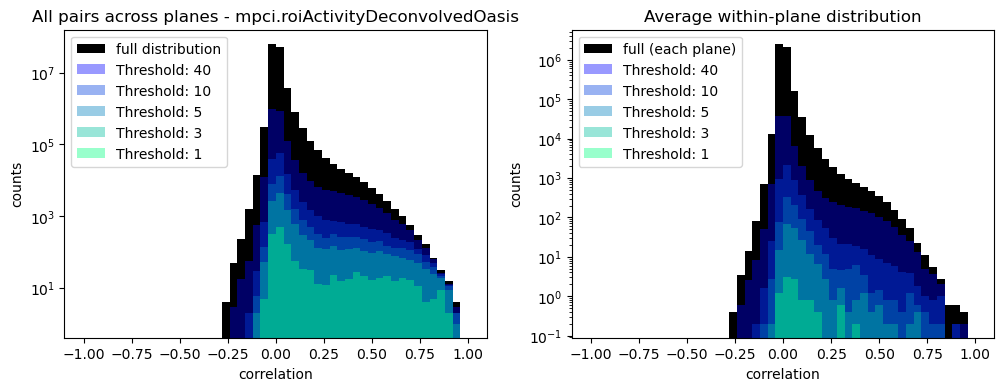

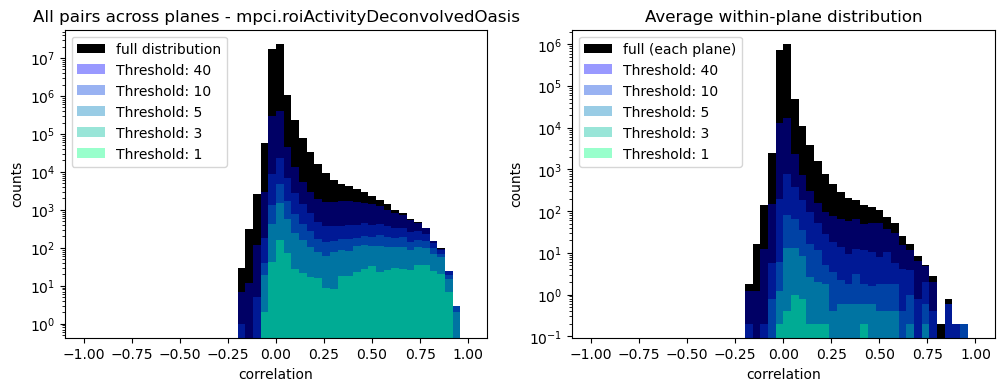

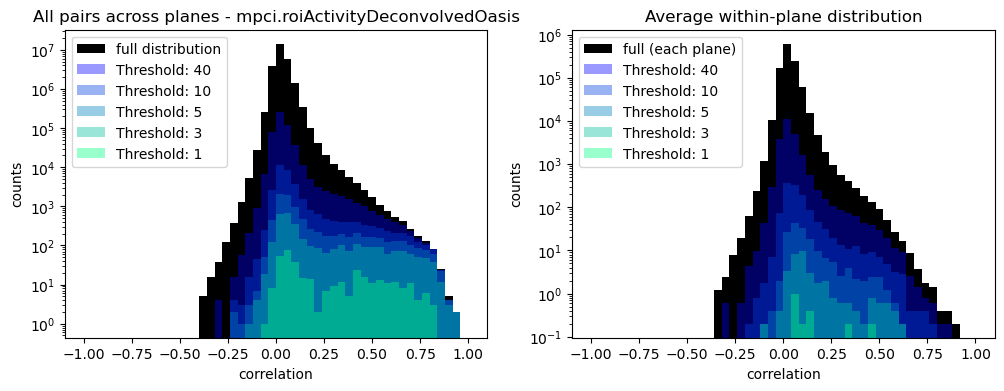

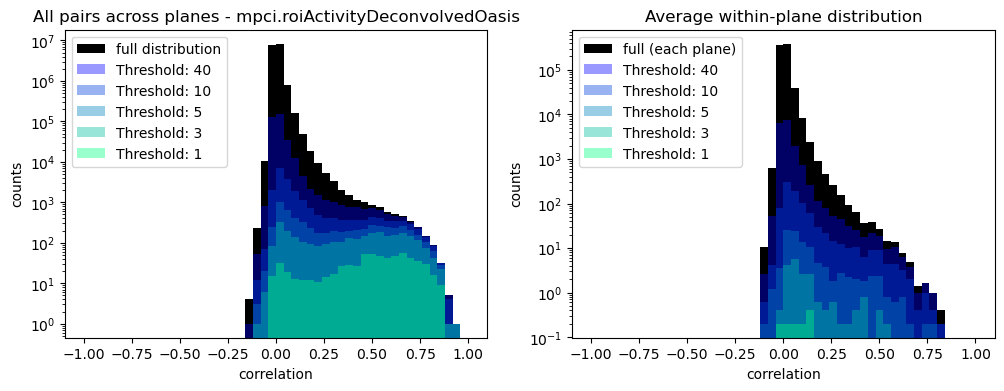

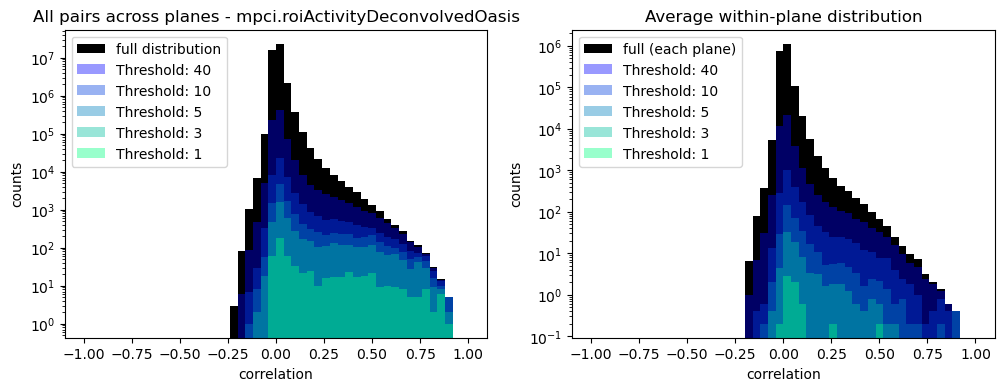

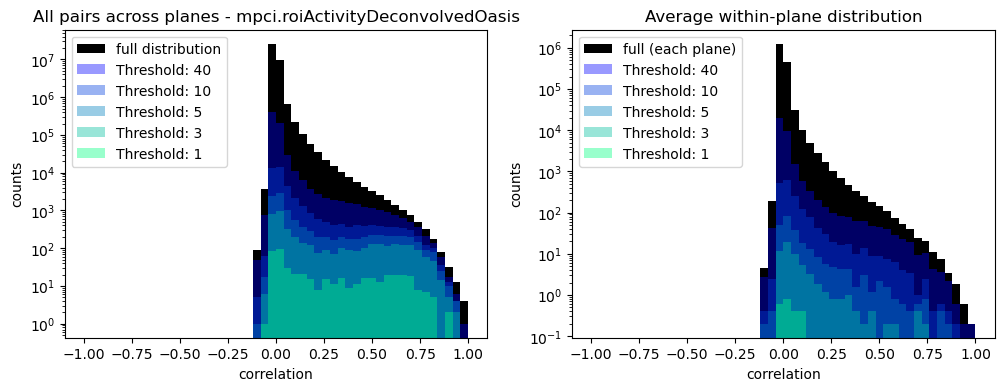

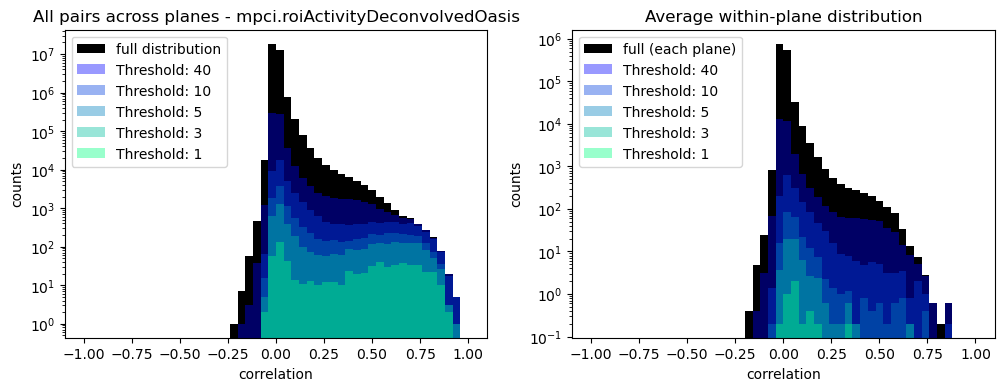

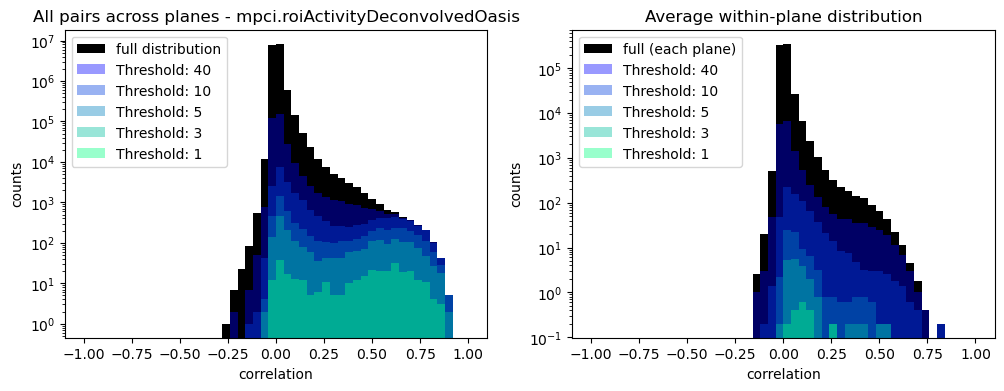

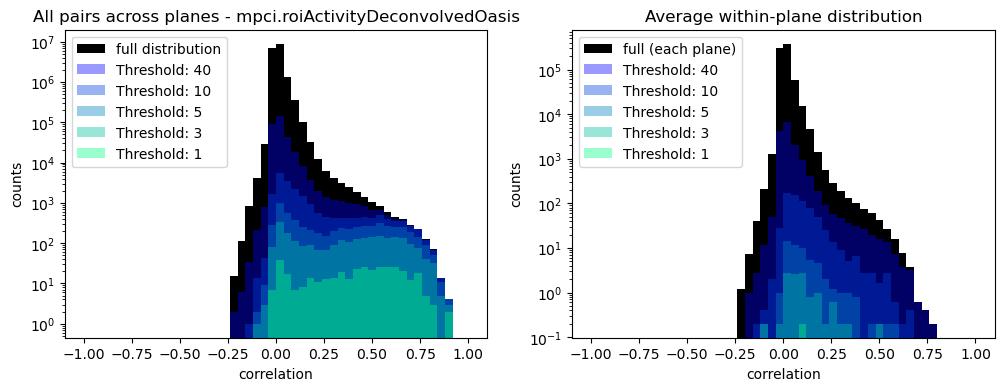

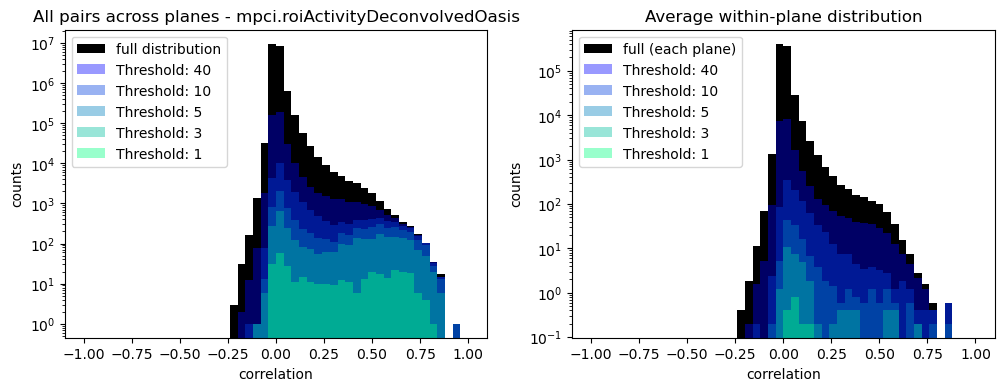

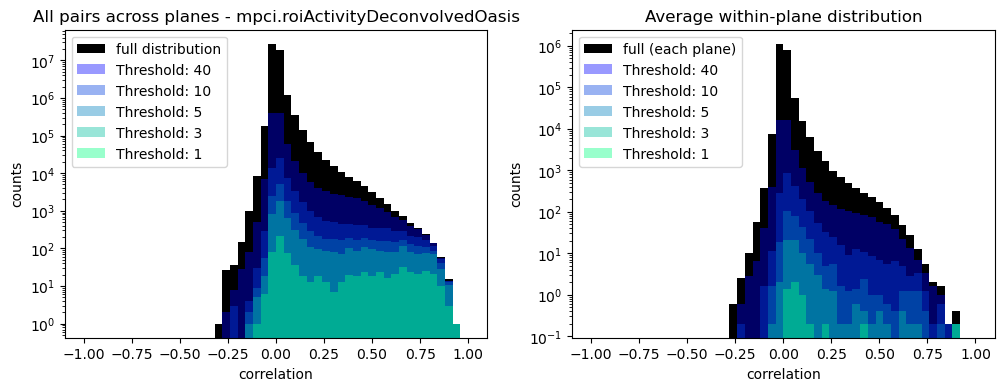

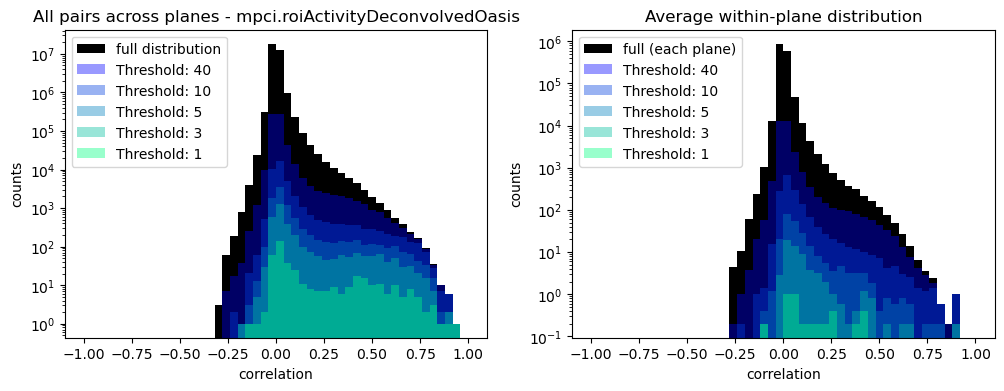

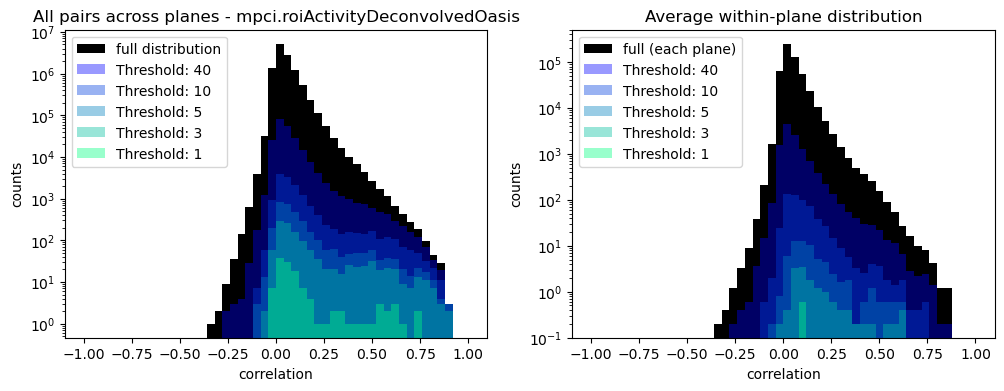

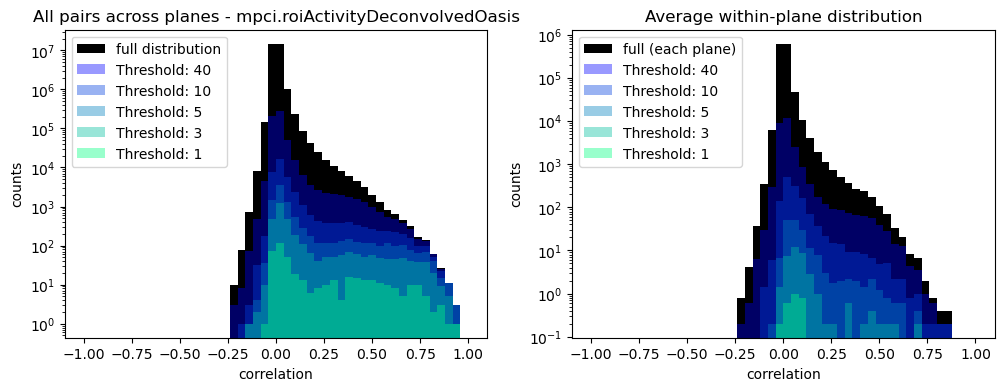

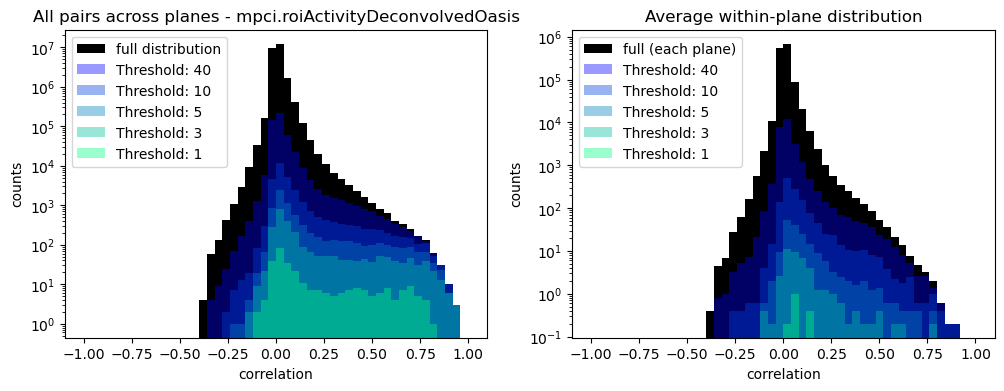

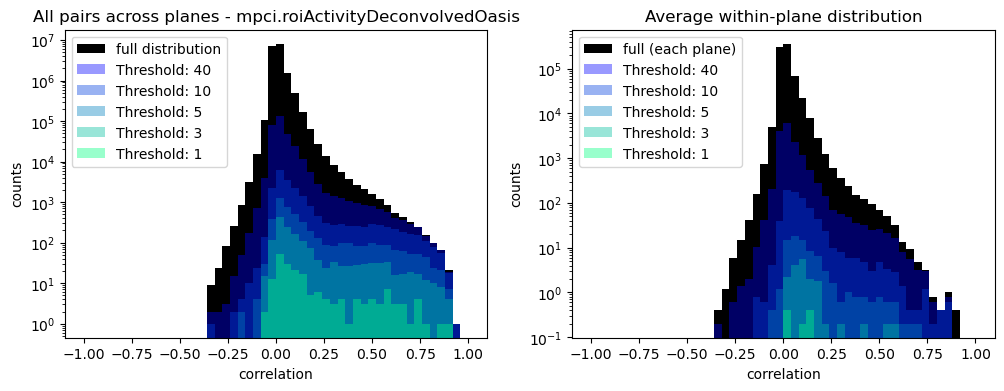

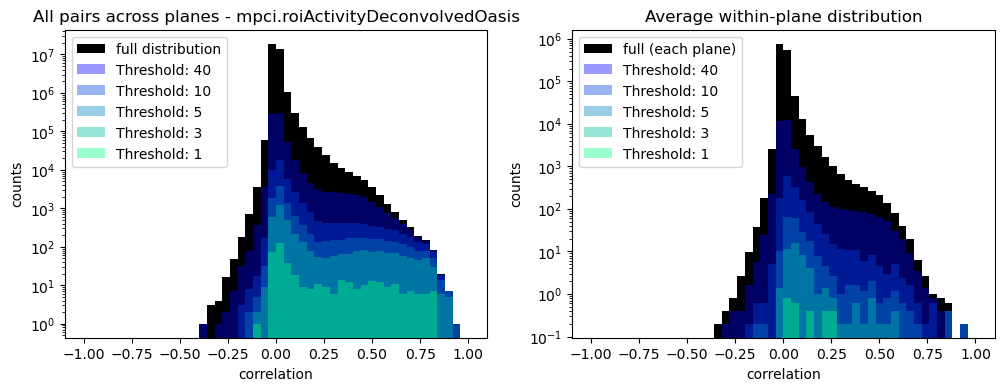

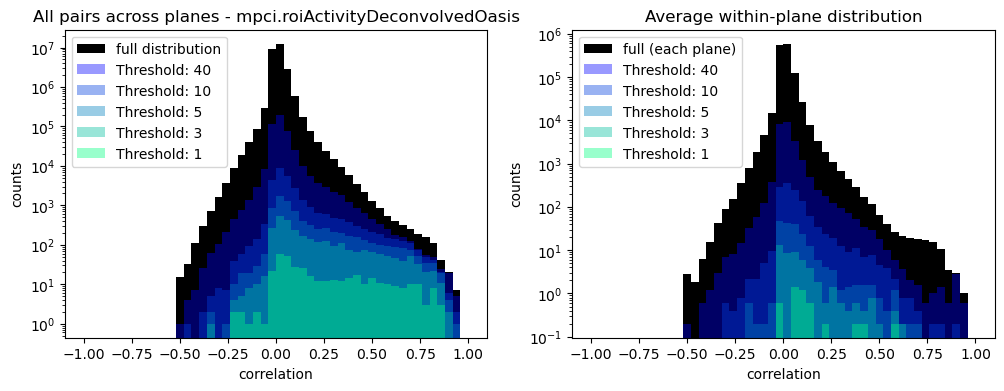

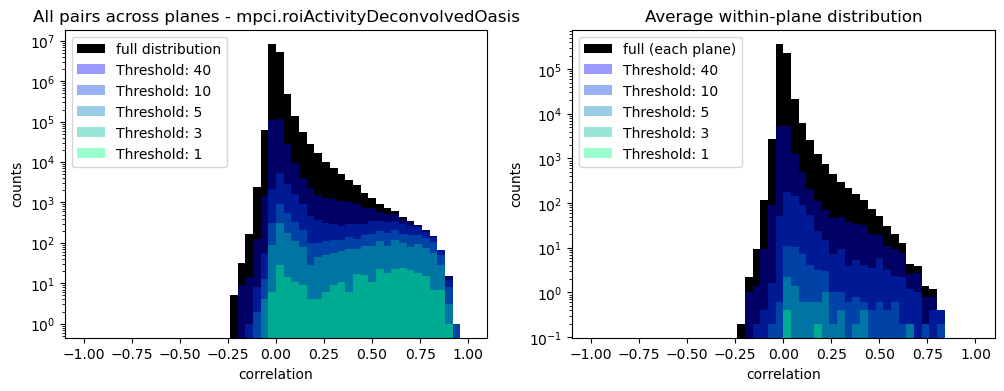

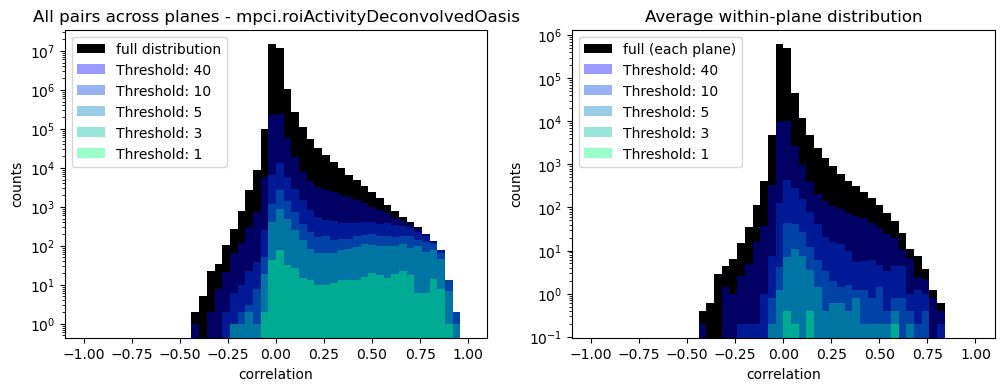

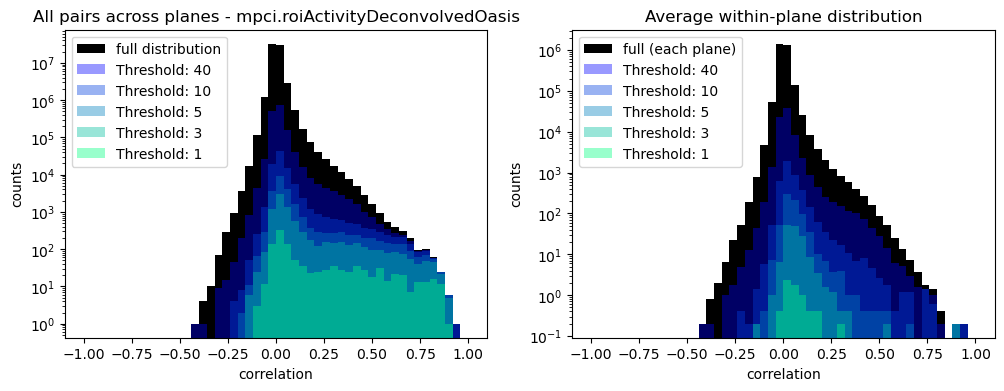

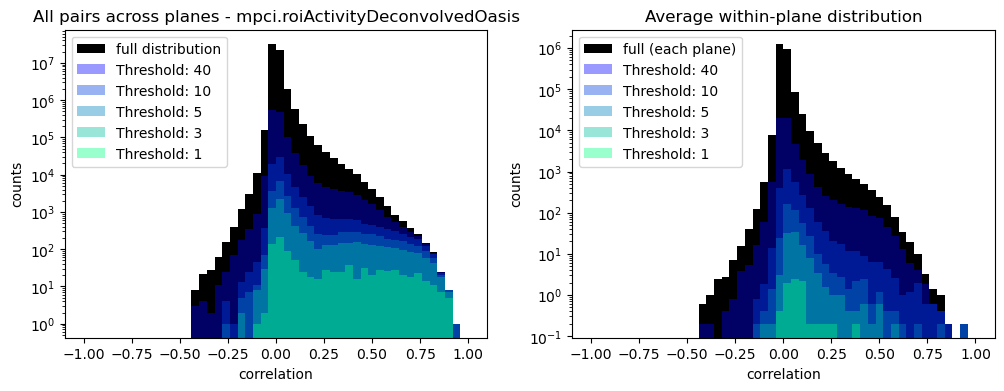

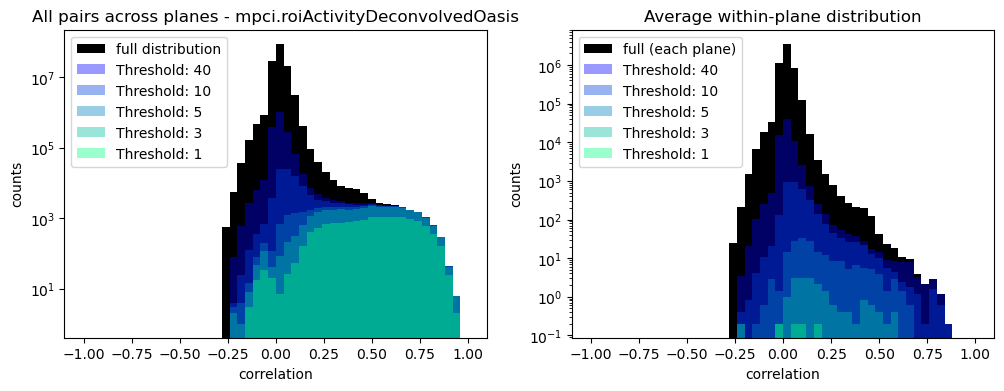

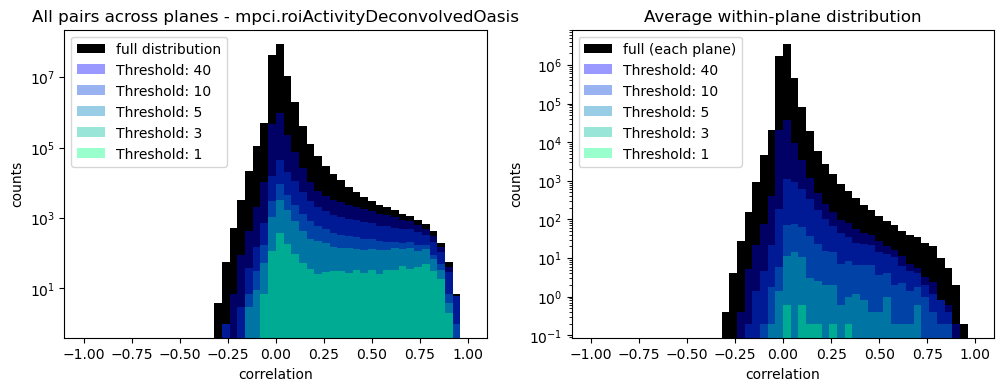

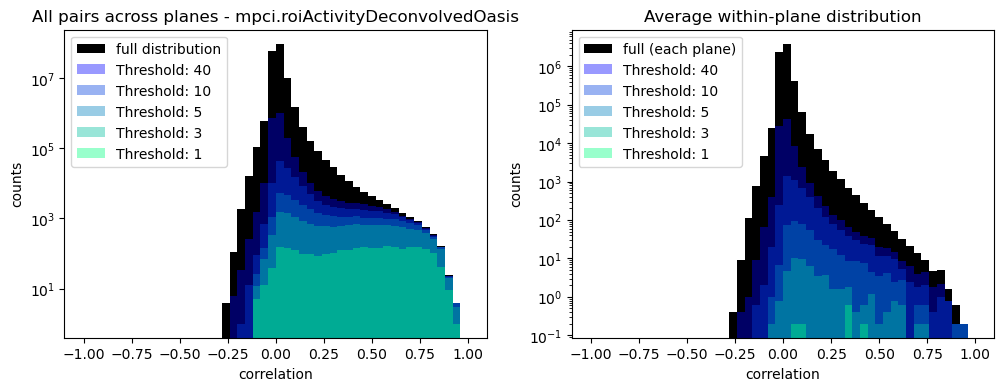

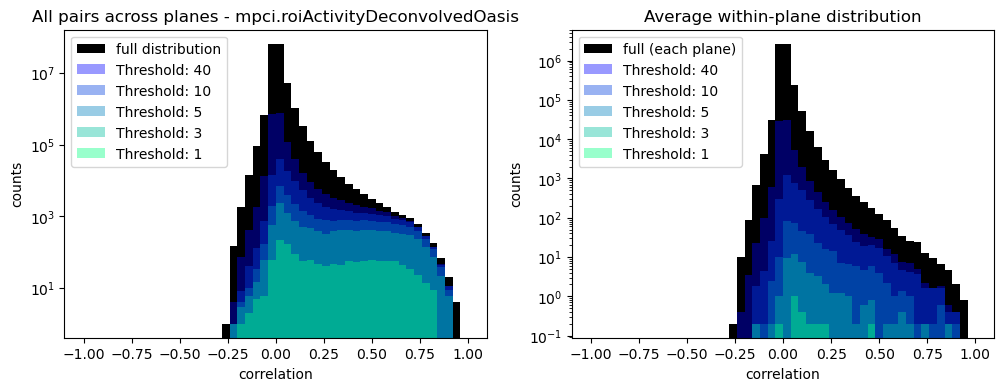

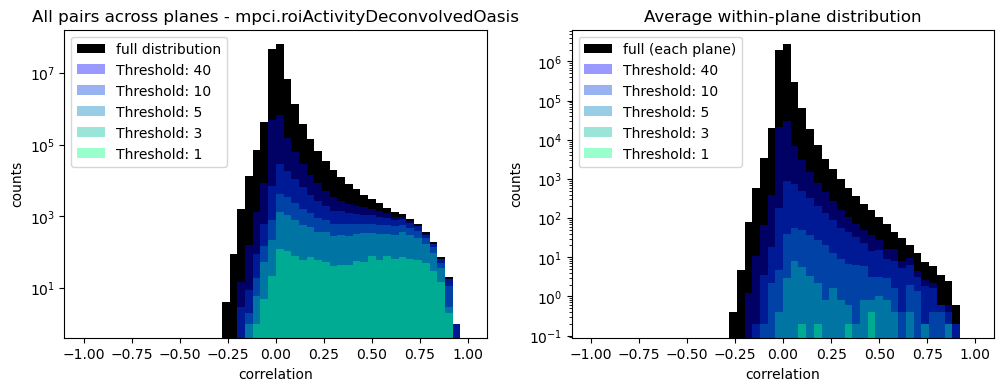

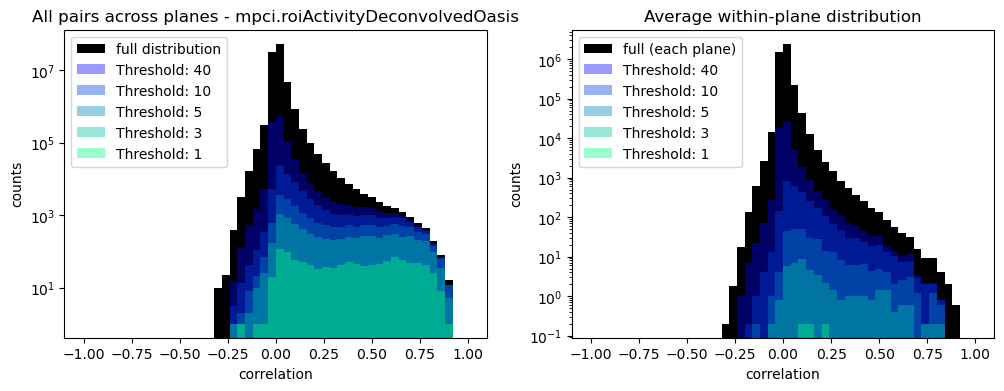

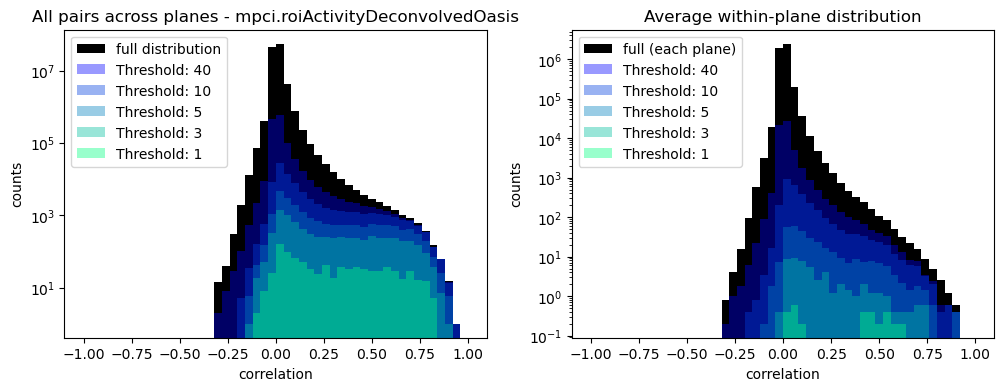

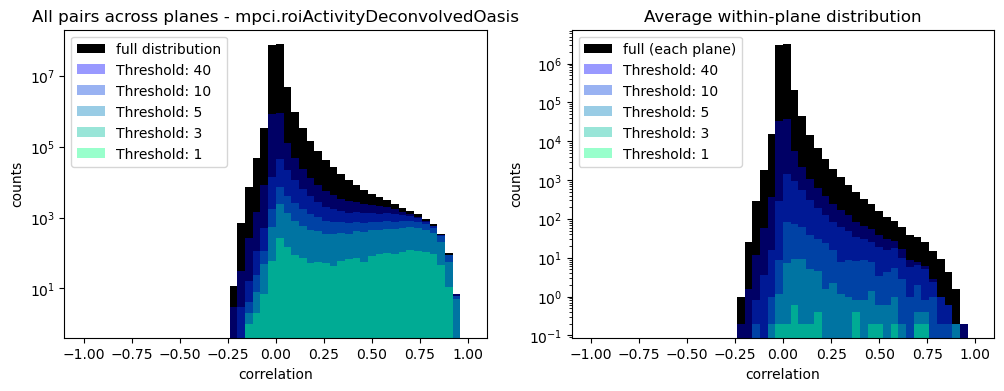

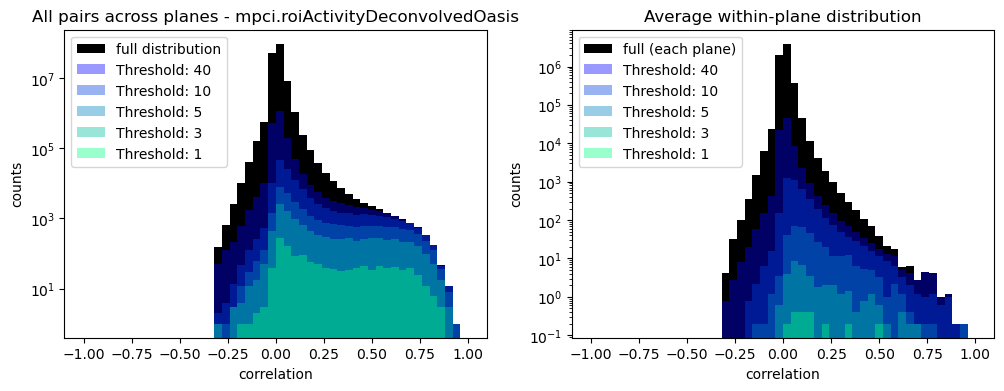

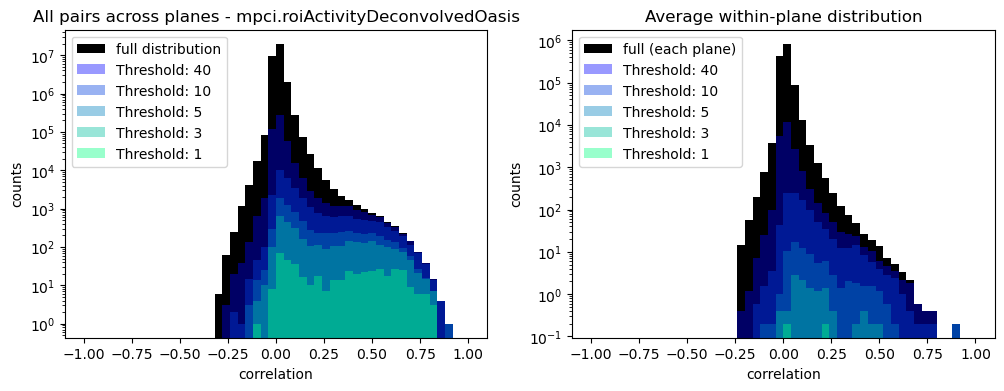

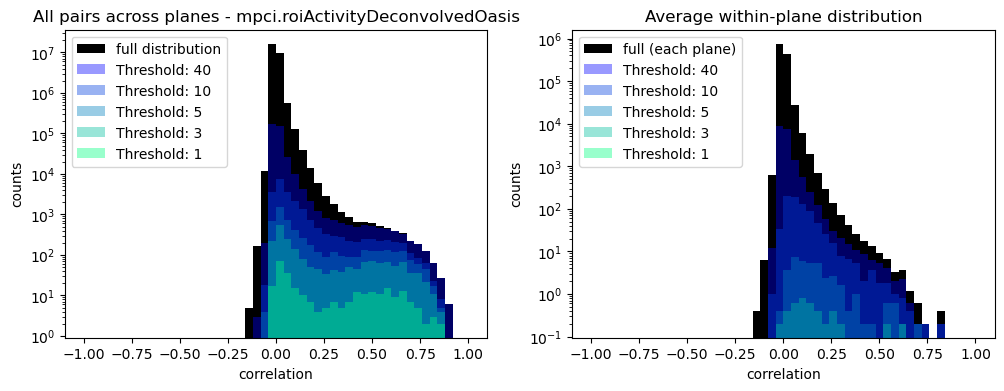

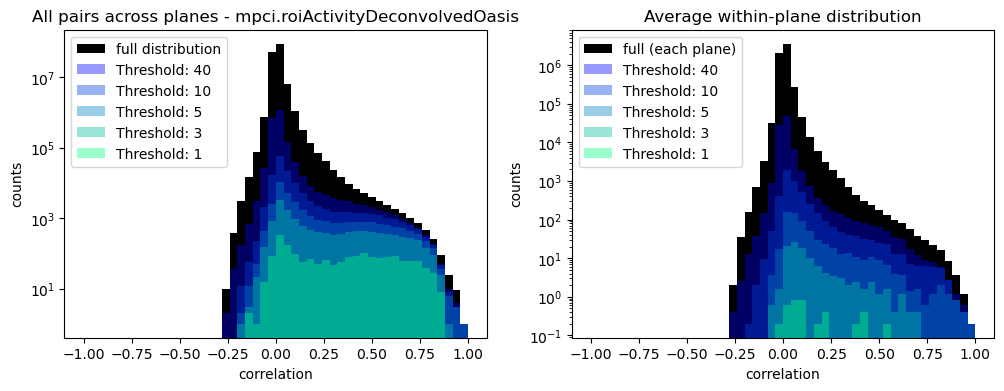

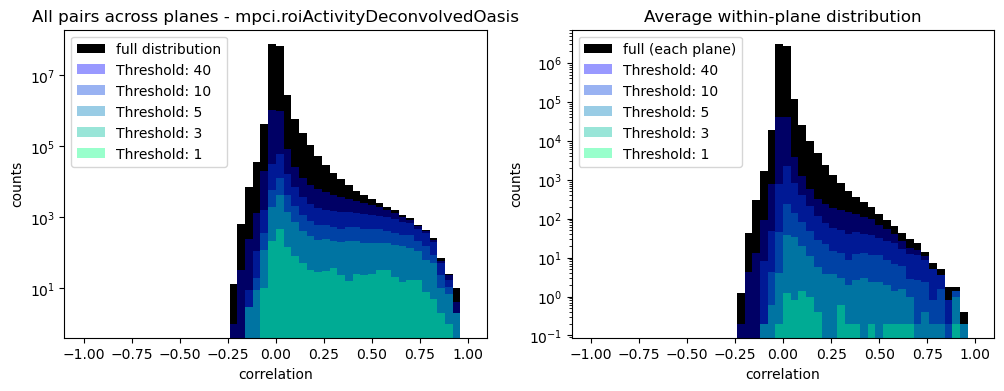

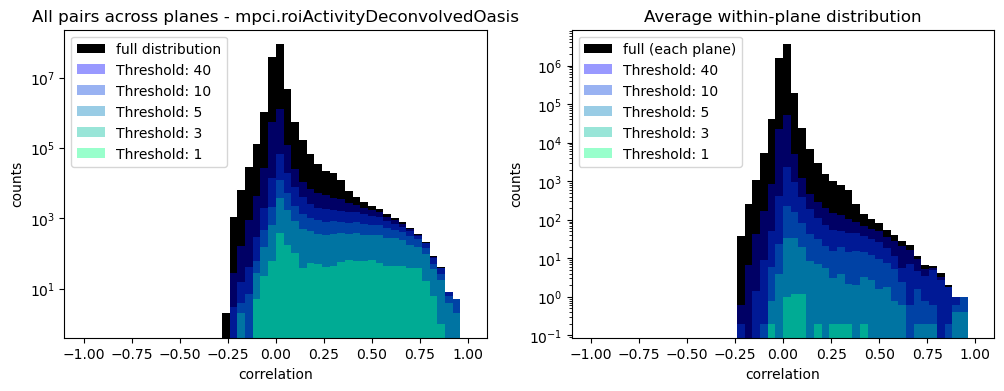

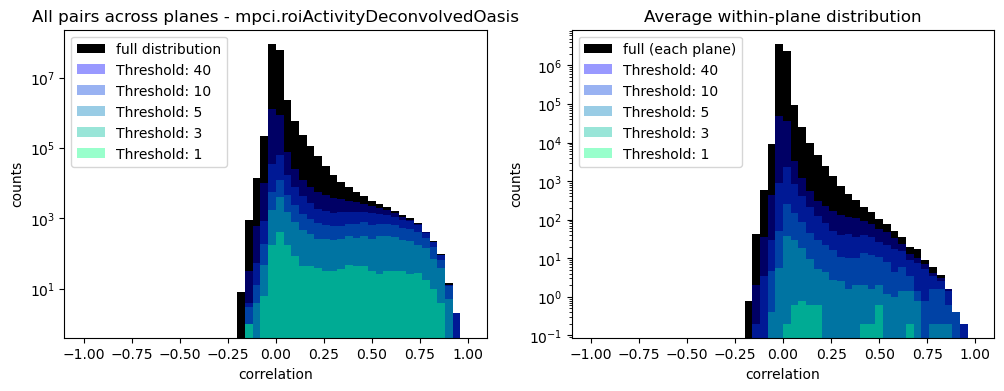

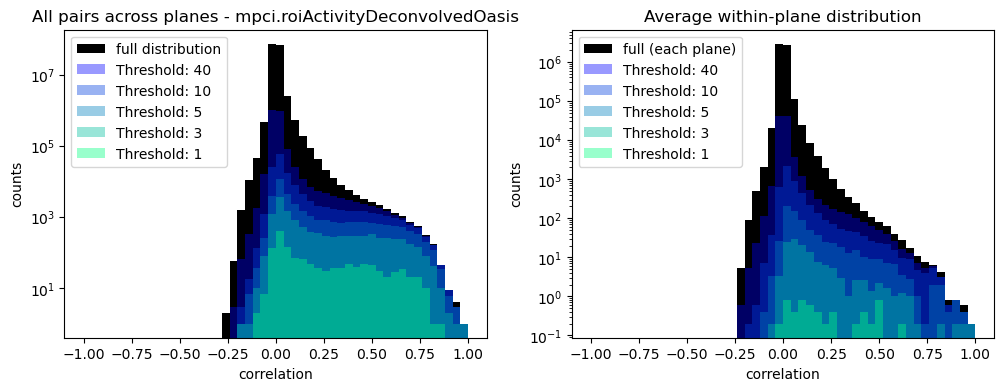

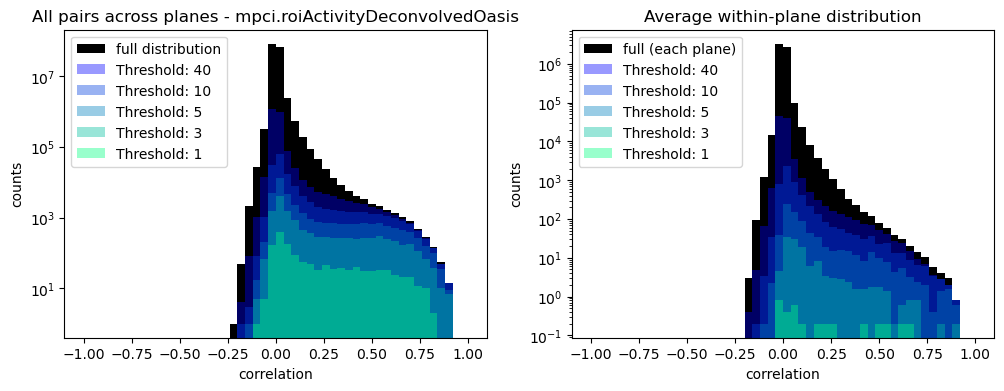

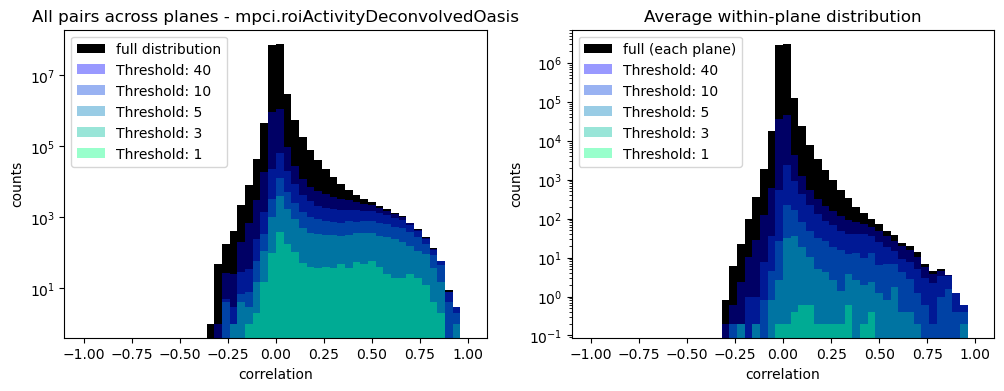

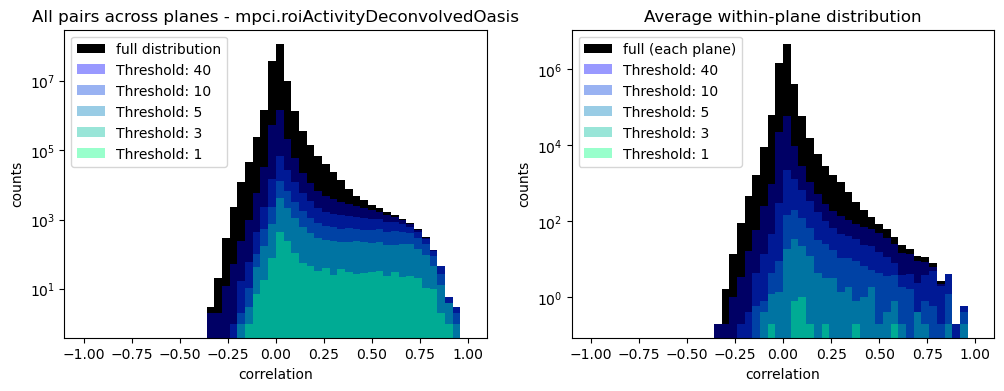

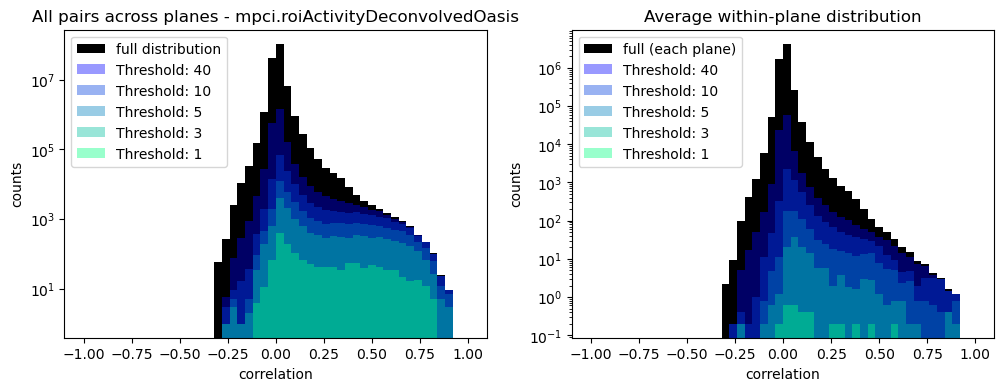

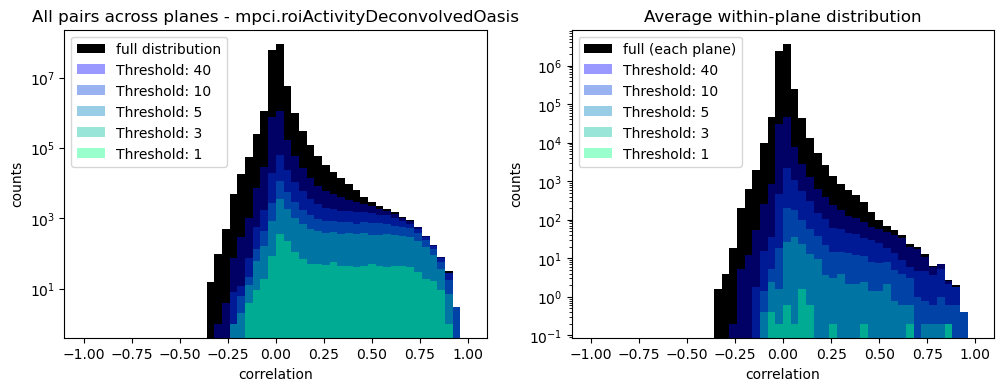

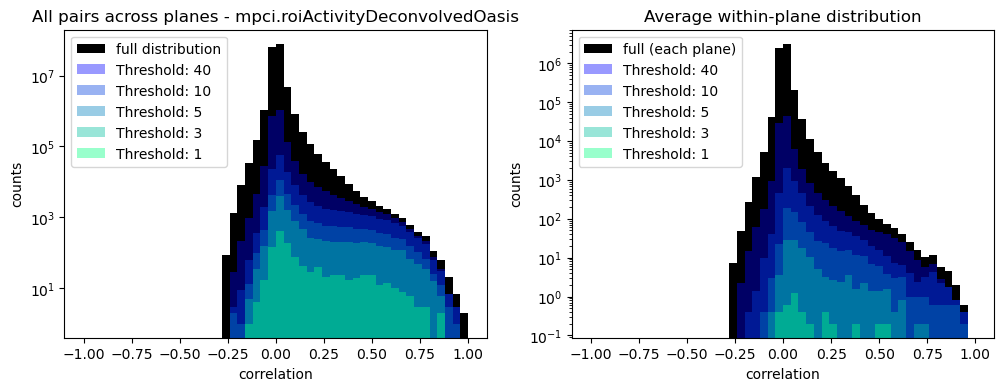

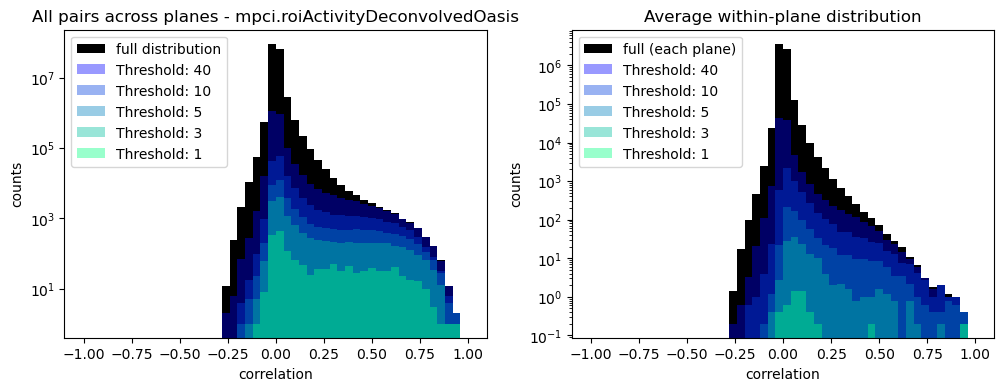

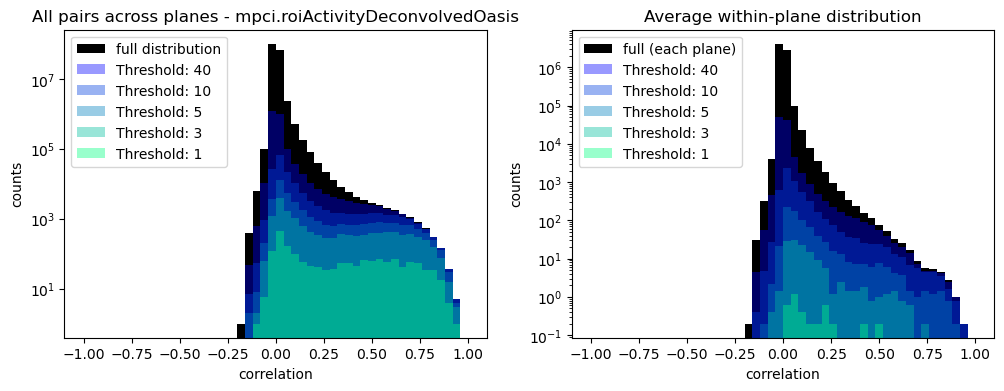

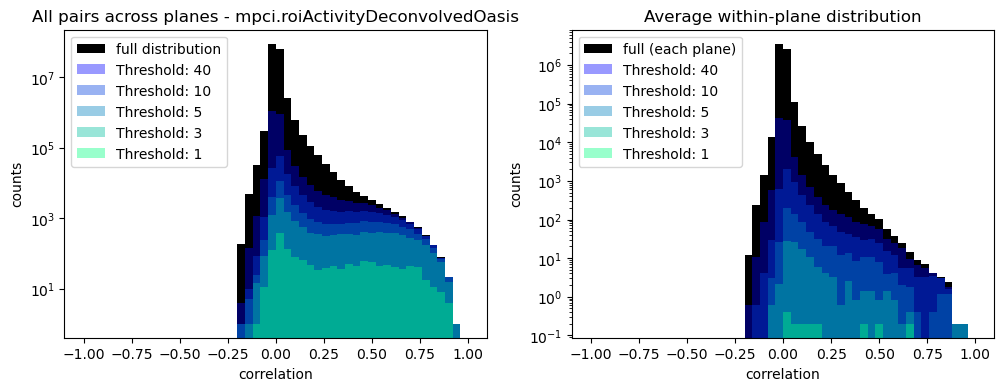

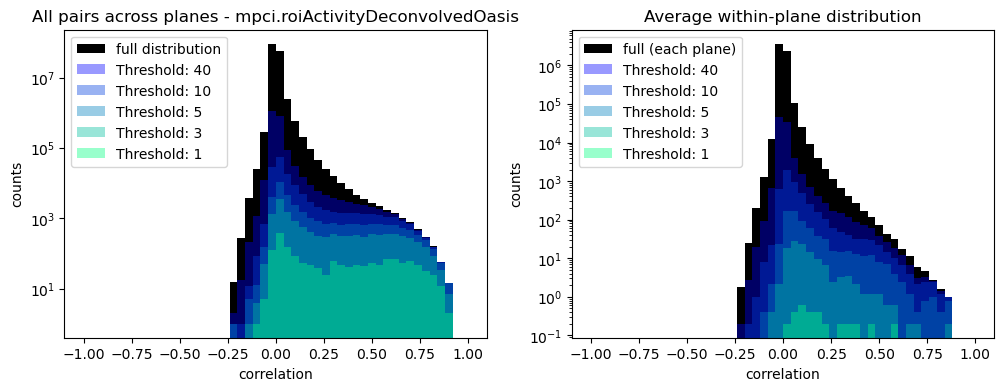

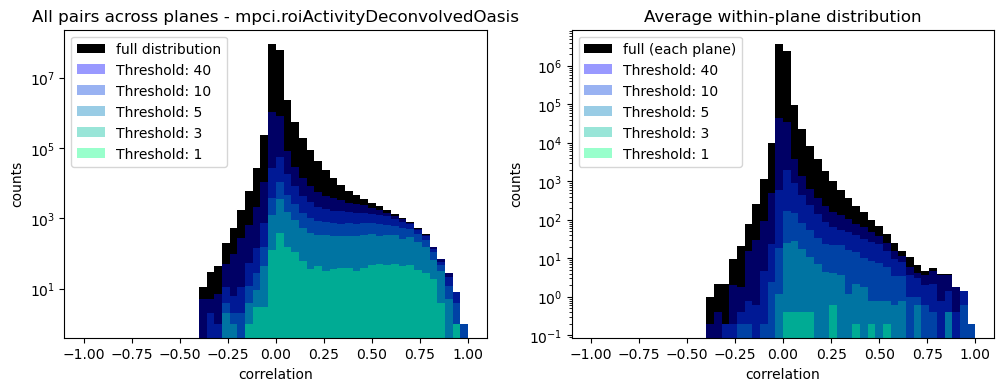

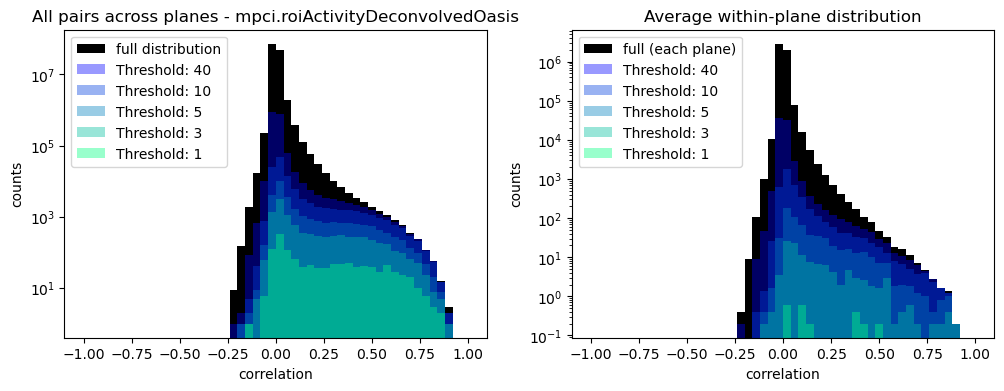

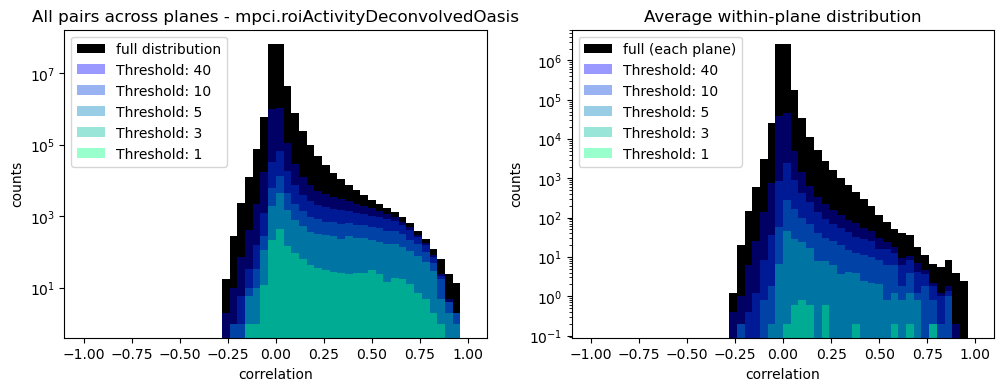

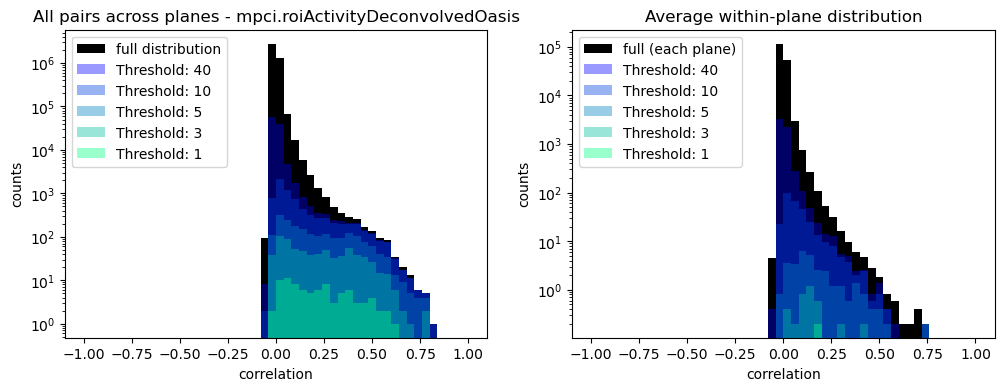

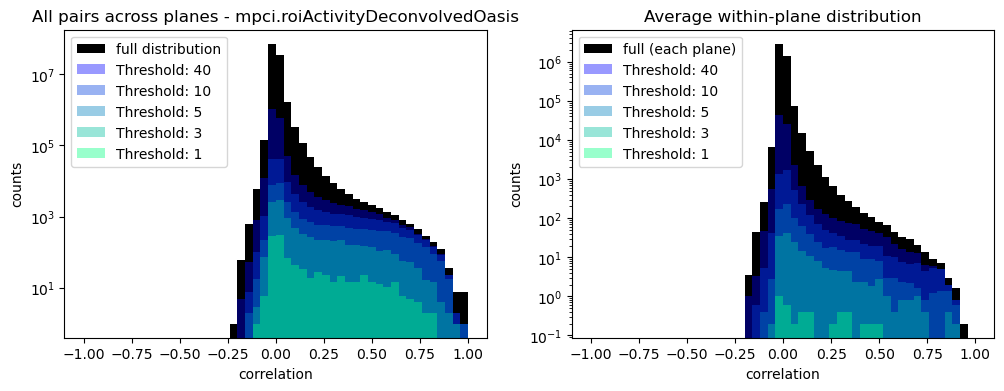

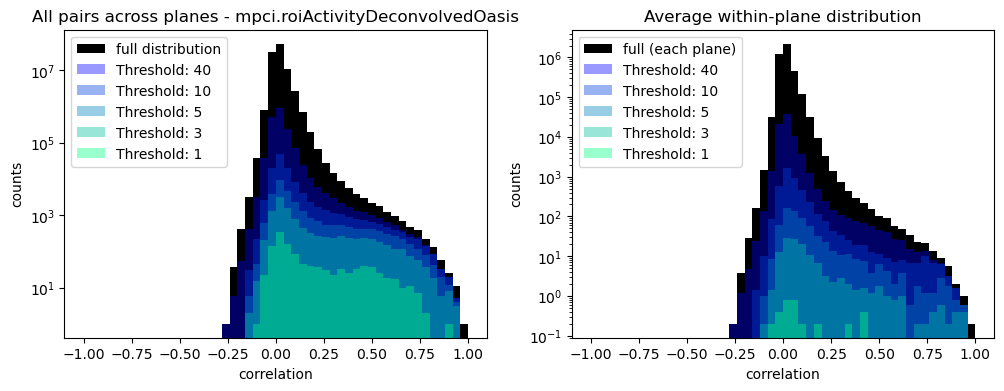

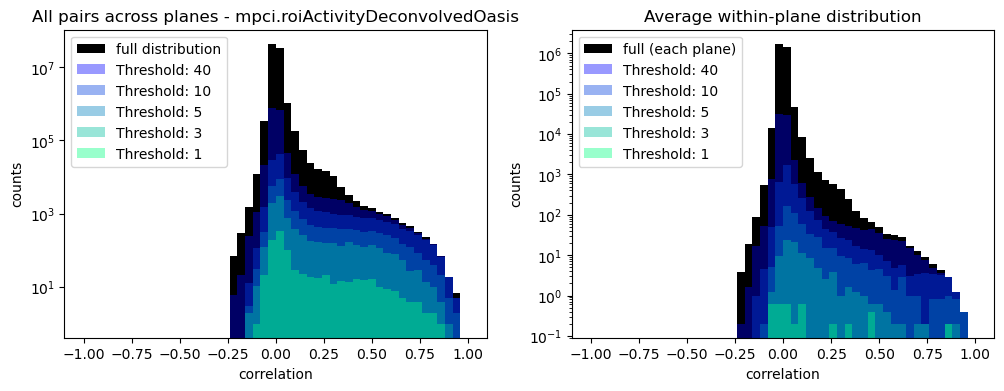

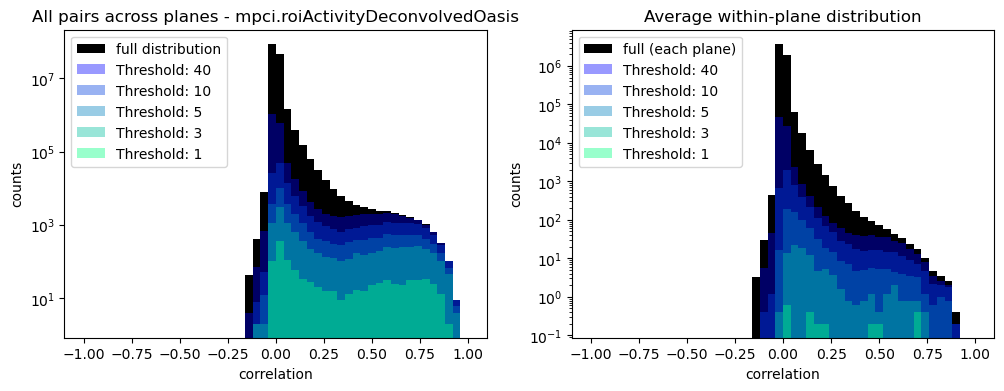

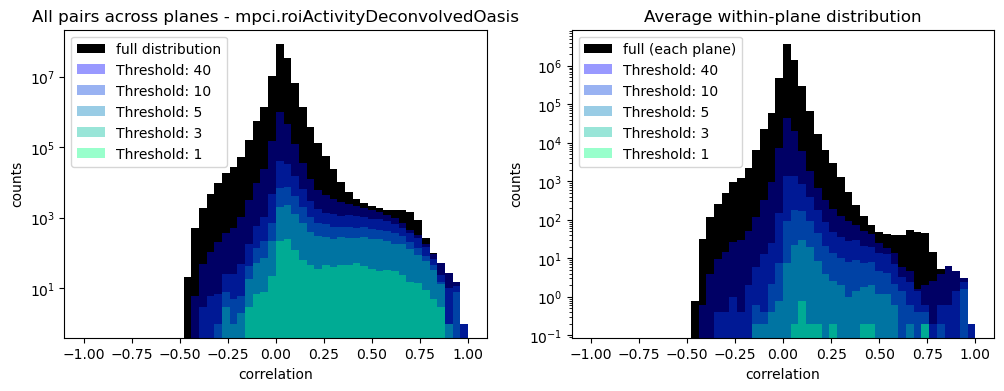

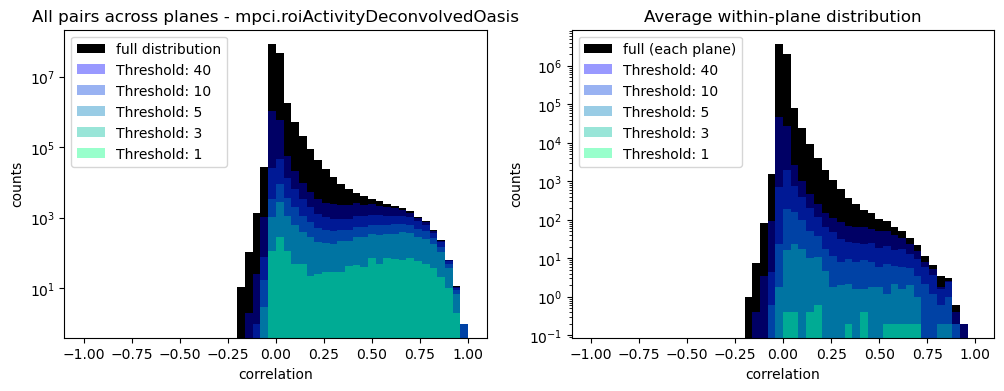

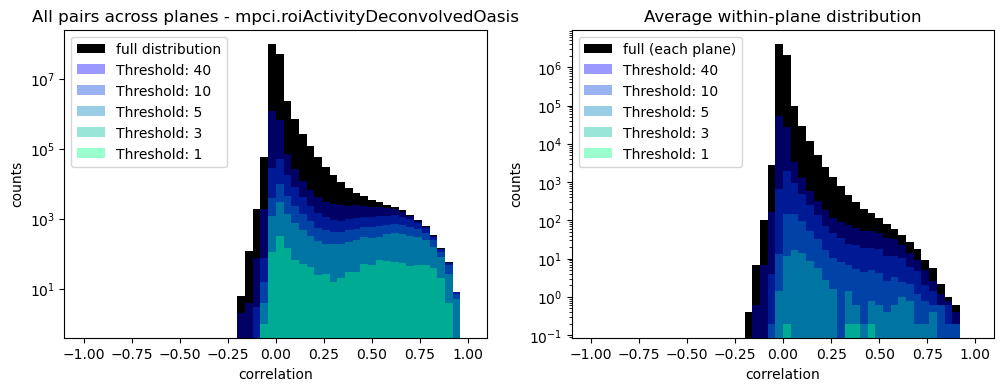

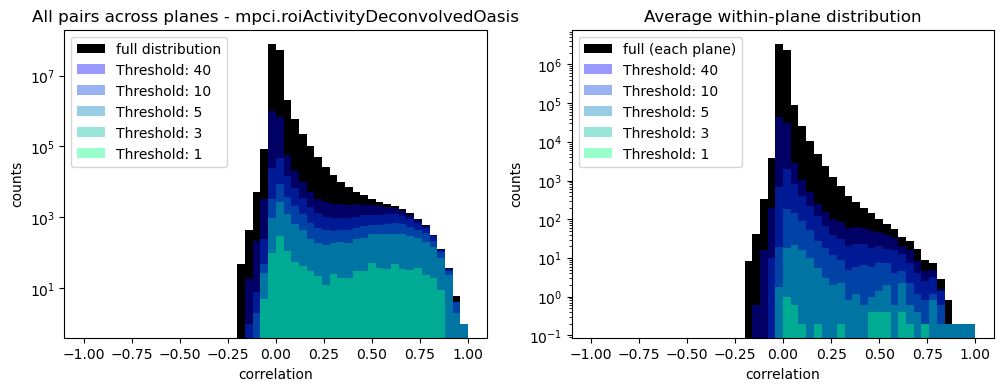

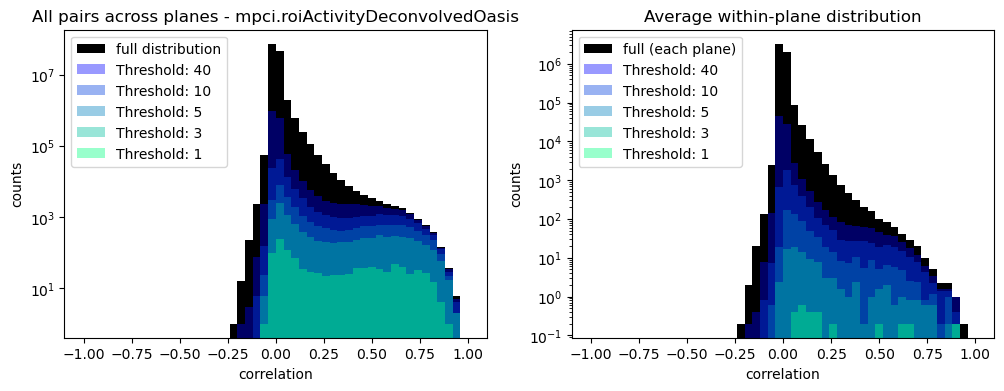

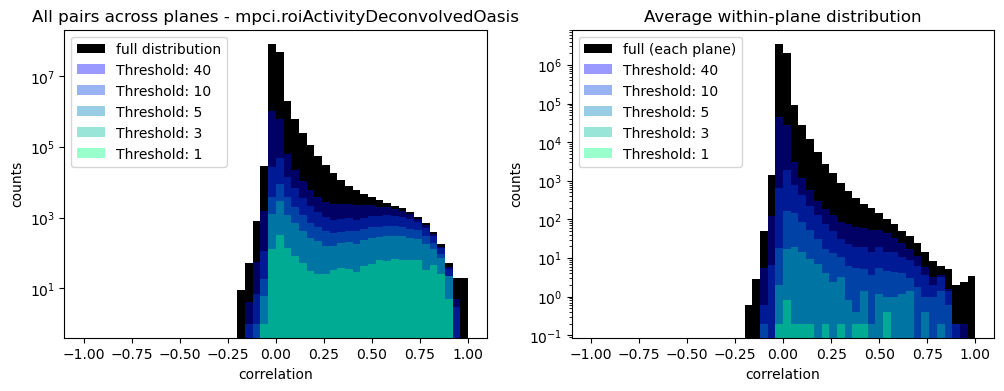

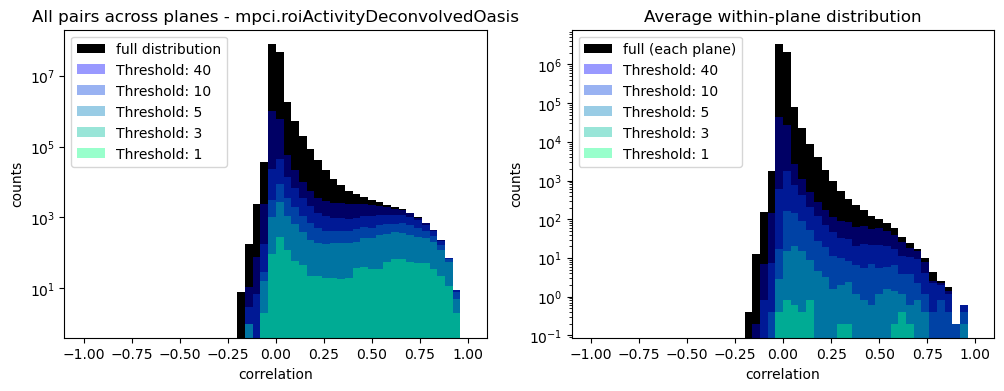

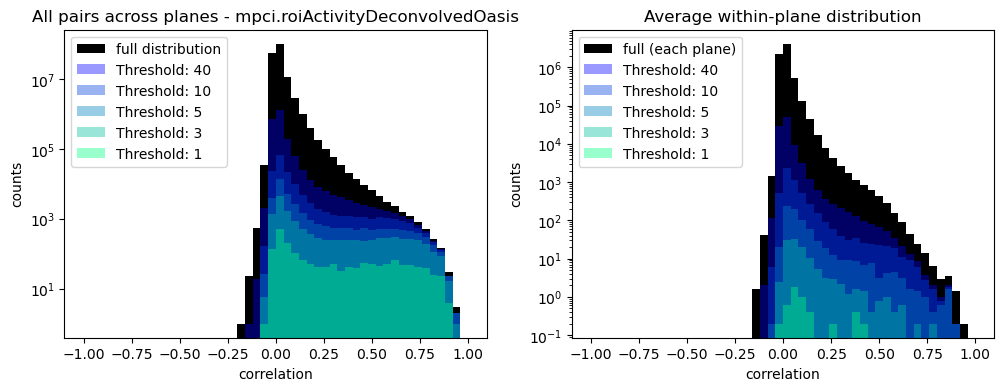

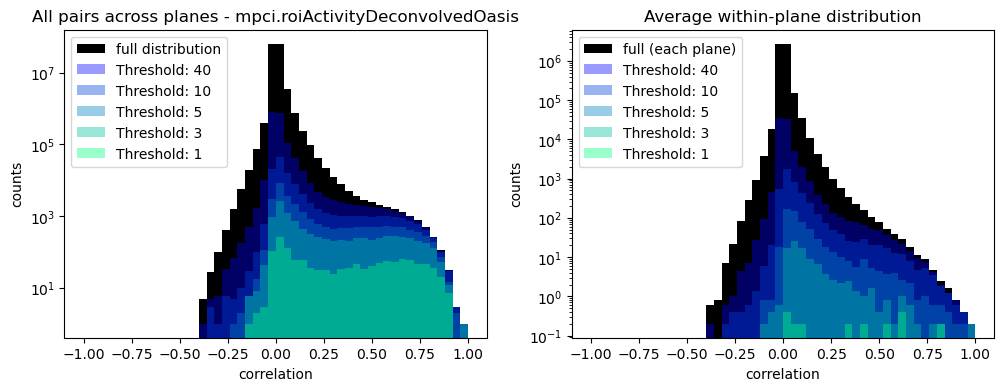

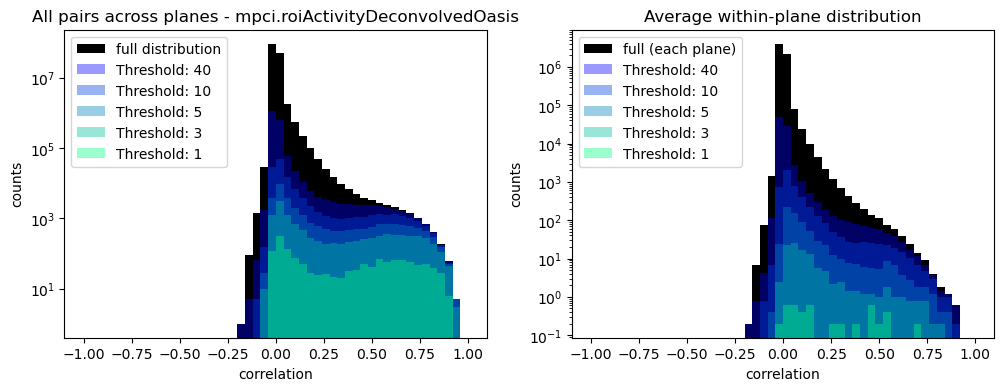

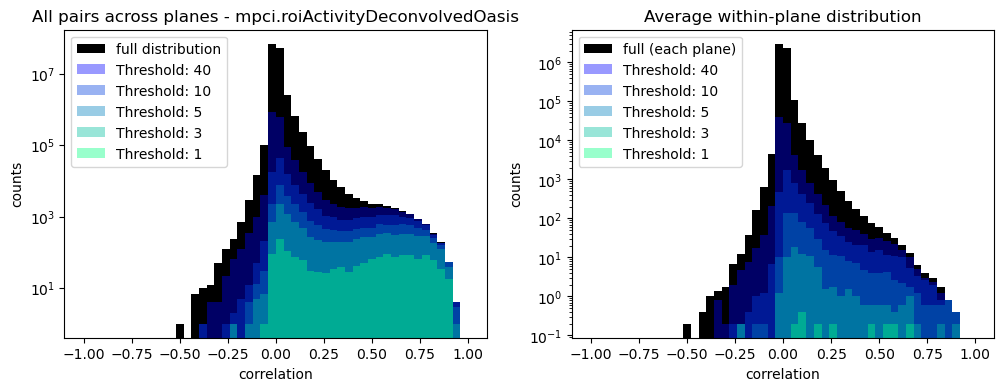

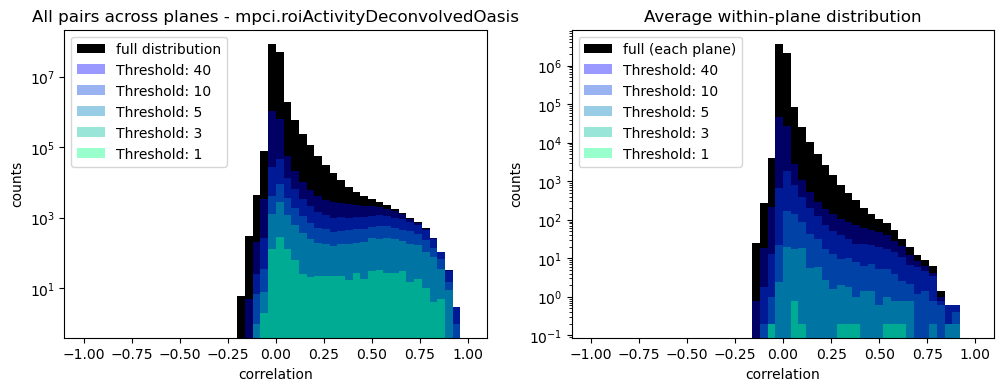

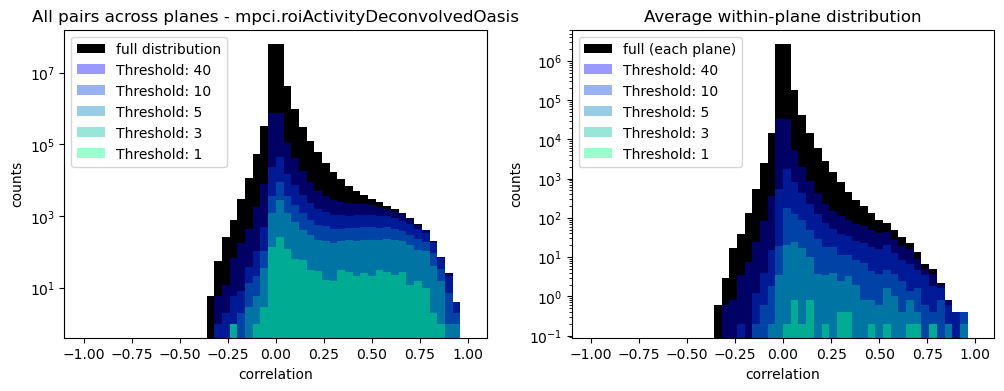

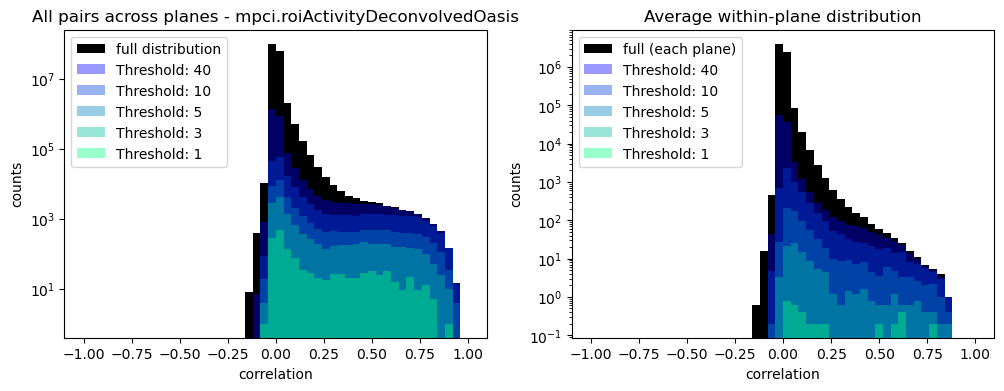

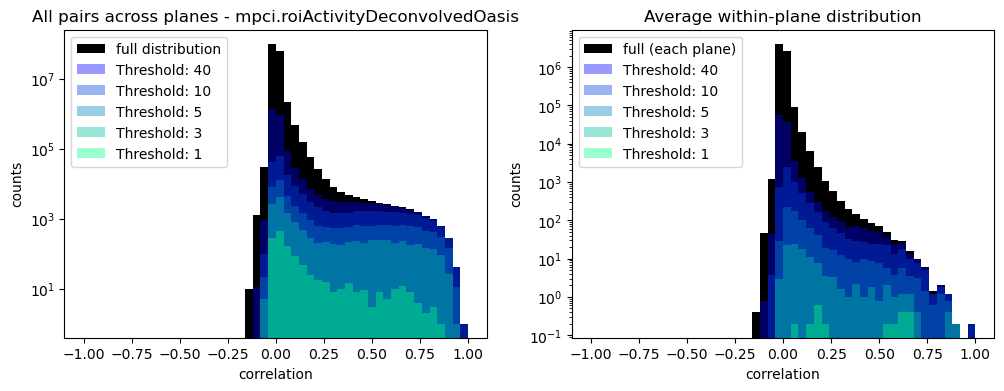

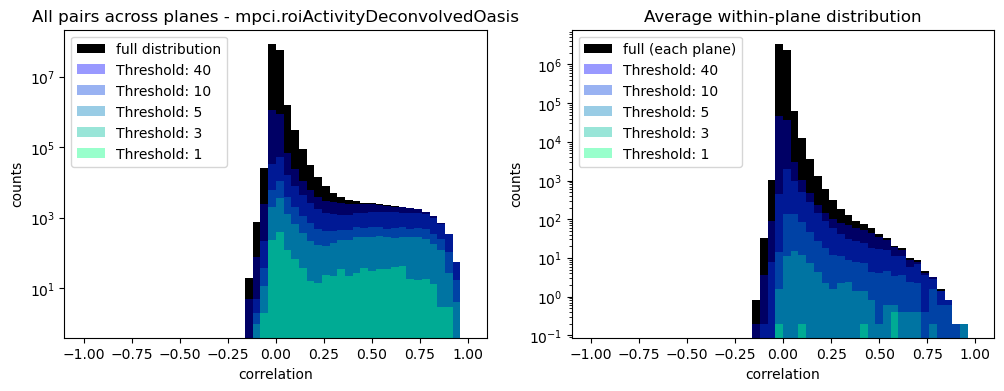

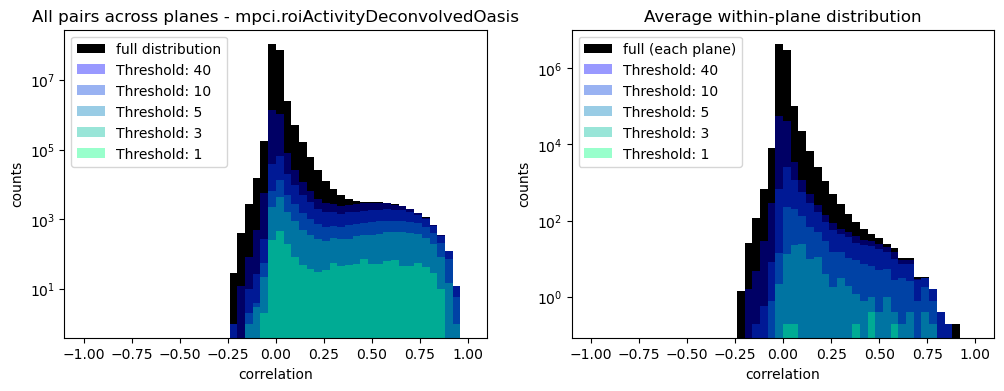

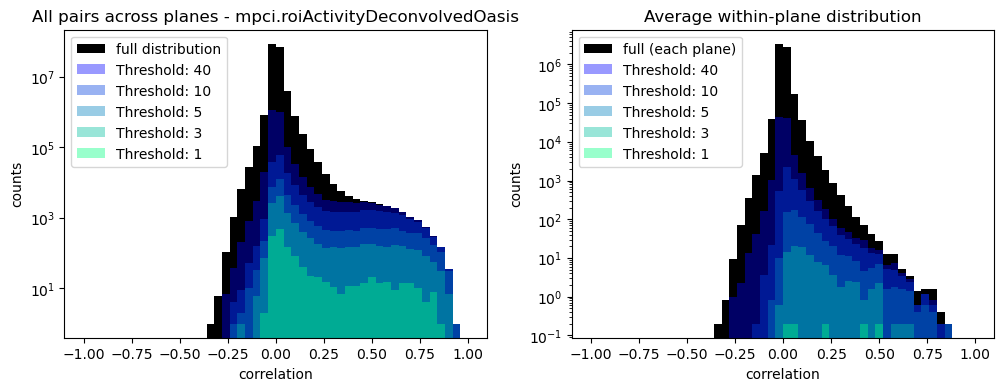

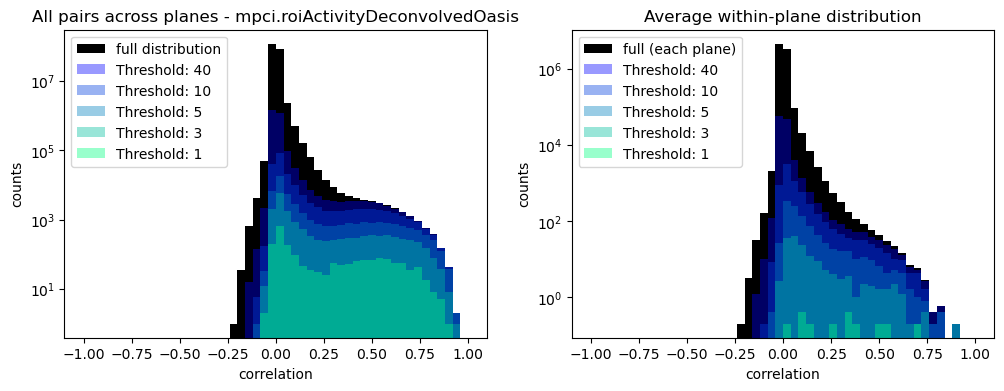

In [198]:
for idx, row in vrdb.getTable(imaging=True, vrRegistration=True).iterrows():
    plt.close('all')
    cVrExp = vrdb.vrExperiment(row)
    scc = vra.sameCellCandidates(cVrExp)
    scc.plotSession(withSave=True);

In [ ]:
sameCellCand = vra.sameCellCandidates(vrexp, onefile='mpci.roiActivityDeconvolvedOasis')

C:\Users\andrew\Documents\localData\analysis\sameCellCandidates\mpci.roiActivityDeconvolvedOasis
ATL020_2023-05-04_702


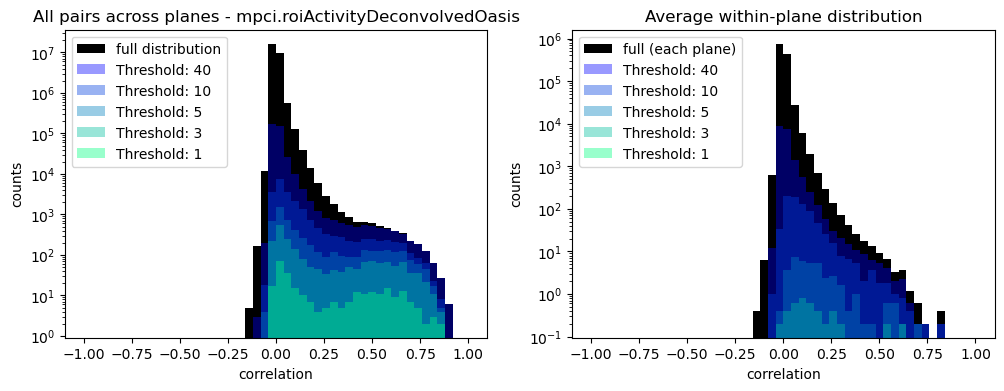

In [194]:
sameCellCand.plotSession(withSave=True);

In [68]:
nbins = 25
binEdges = np.logspace(-1,np.log10(690),nbins+1)
binCenters = bf.edge2center(binEdges)
idx = np.digitize(pwDistance, binEdges)
mnPairs = np.array([np.mean(xcPairs[idx==ii]) for ii in range(nbins)])
stdPairs = np.array([np.std(xcPairs[idx==ii])/np.sum(idx==ii) for ii in range(nbins)])

(0.1, 689.9999999999999)

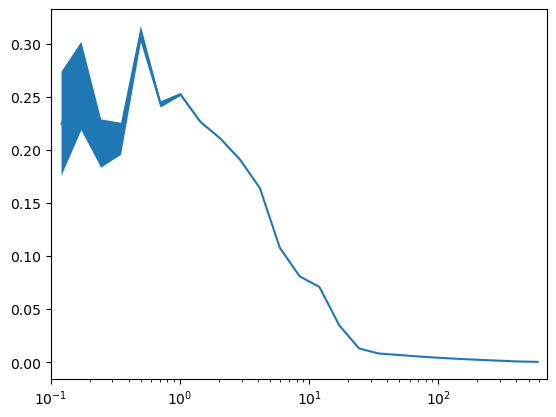

In [69]:
plt.plot(binCenters, mnPairs)
plt.fill_between(binCenters, mnPairs+stdPairs, mnPairs-stdPairs)
plt.xscale('log')
plt.xlim(binEdges[0],binEdges[-1])

In [ ]:
x = pwDistance
y = xcPairs

xmin, xmax = 0, 700
ymin, ymax = -1, 1

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = sp.stats.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
cset = ax.contour(xx, yy, f, colors='k')
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Y1')
ax.set_ylabel('Y0')

plt.show()

In [56]:
# Database Requirements: 
# ---------------------
# GUI: db manager
# - show full database -
# - show selected entries (like for example entries with imaging but no suite2p) -
#                --> It would be sweet to make this work where there are some defaults, but then there is also a "filter command" option which you type and goes as the input to the filtering
# - click on entry and do things:
#                --> open file explorer to that session
#                --> do suite2p
#                --> do red cell management
# - update table data? 
# ---------------------
# Operational Commands: 
# - Automatically do suite2p 
# - Check if registration was done before a suite2p update
# - Find way to determine if a suite2p file was updated after the folder was made (indicating that QC was done afterwards) -- so registration should be rerun for imaging data at least
#    -- check if "iscell" is the only thing that was done after registration. In this case, just update the iscell oneData
# ---------------------
# - Add new entry GUI!!!
# ---------------------
# - Check session folders to see if new session is present that isn't registered in the database? 
# ---------------------
# vrExperimentUpdates: 
# -- if edited iscell, will need to re-register the number of ROIs per plane (in "self.values") and reprocess imaging data!
# ---------------------
# vrExperimentRegistration
# -- if error, then note there was an error and append an explanation...!!!
# ---------------------
# I need a readme file for the dbManagement component that shows common uses (e.g. a tutorial)
#    - because otherwise I'll forget what I wrote....
# ---------------------

In [ ]:
# Creating a suite2p classifier
# Let's put a few sessions (all planes) into the classifier by "building" a new classifier
# I'll get at least 2 sessions from each mouse...

# List of QC'd sessions:
# ATL012/2023-01-18/701 Planes 
# ATL028/2023-08-08/701 Planes 1, 2

In [189]:
vrdb = dbm.vrDatabase()

In [9]:
vrdb.registerSessions(maxData=50e9)

In registerSessions, 'vrBehaviorVersion' is an important input that hasn't been coded yet!


In [10]:
for idx, row in vrdb.needsRegistration().iterrows():
    print(vrdb.vrSession(row).sessionPrint())

In [11]:
db = vrdb.getTable(suite2p=True)
for idx, row in db.iterrows():
    print(vrdb.vrSession(row).sessionPrint(), row['suite2pDate'])

ATL012/2023-01-18/701 2023-01-18 14:20:04
ATL012/2023-01-20/701 2023-01-20 11:15:30
ATL012/2023-01-20/702 2023-01-20 13:44:47
ATL012/2023-01-23/701 2023-01-23 13:32:56
ATL012/2023-01-24/703 2023-01-24 11:05:34
ATL012/2023-01-25/701 2023-01-25 10:19:05
ATL012/2023-01-26/702 2023-08-10 09:23:42
ATL012/2023-01-27/701 2023-01-27 12:41:10
ATL012/2023-01-30/702 2023-08-17 17:37:21
ATL012/2023-02-01/701 2023-02-11 18:52:22
ATL012/2023-02-02/701 2023-02-12 09:54:55
ATL012/2023-02-06/701 2023-02-12 14:36:14
ATL012/2023-02-07/701 2023-02-12 17:54:09
ATL012/2023-02-08/702 2023-02-13 14:42:00
ATL012/2023-02-09/701 2023-02-17 13:24:17
ATL012/2023-02-14/703 2023-02-17 14:44:52
ATL012/2023-02-15/701 2023-02-17 18:45:50
ATL012/2023-02-16/701 2023-02-20 11:05:53
ATL012/2023-02-20/701 2023-02-20 16:24:37
ATL012/2023-02-21/702 2023-02-27 09:20:44
ATL012/2023-02-22/701 2023-02-27 10:11:00
ATL012/2023-02-27/701 2023-02-27 14:07:55
ATL012/2023-02-28/701 2023-03-22 11:00:00
ATL012/2023-03-01/701 2023-08-17 2

In [13]:
fm.s2pTargets('ATL022','2023-04-26','701')

\\zaru.cortexlab.net\Subjects\ATL022\2023-04-26\701
C:\Users\andrew\Documents\localData\ATL022\2023-04-26\701


In [74]:
vrdb.printRegistrationErrors()

In [73]:
vrdb.registerSingleSession('ATL022','2023-04-26','701')

Performing vrExperiment preprocessing for session: ATL022/2023-04-26/701
Cleared oneData from session: ATL022/2023-04-26/701
In session: ATL022/2023-04-26/701, vrFile['rigInfo'] does not exist. Assuming default settings for B2!
Self.value['numTrials'] set by trialInfo.trialIdx>0, but this might not be right. There might be smarter ways to determine which trials are 'good' trials...
Performing oasis...


100%|████████████████████████████████████████████████████████████████████████████| 17527/17527 [04:12<00:00, 69.30it/s]


Computing red cell features for ATL022/2023-04-26/701... (usually takes 10-20 seconds)
Facecam preprocessing has not been coded yet!
Saving params...
Session ATL022/2023-04-26/701 registered with 5.74 GB oneData.


True

In [84]:
vrdb.updateSuite2pDateTime()
vrdb.checkS2P(withDatabaseUpdate=True)

In [24]:
vre.vrSession('ATL012','2023-01-18','701').sessionPath()

WindowsPath('C:/Users/andrew/Documents/localData/ATL012/2023-01-18/701')

In [75]:
vrdb.printRequiresS2P(needsQC=True)

Database indicates that suite2p has been run but not QC'd: ATL012/2023-01-18/701
Database indicates that suite2p has been run but not QC'd: ATL012/2023-01-20/701
Database indicates that suite2p has been run but not QC'd: ATL012/2023-01-20/702
Database indicates that suite2p has been run but not QC'd: ATL012/2023-01-23/701
Database indicates that suite2p has been run but not QC'd: ATL012/2023-01-24/703
Database indicates that suite2p has been run but not QC'd: ATL012/2023-01-25/701
Database indicates that suite2p has been run but not QC'd: ATL012/2023-01-26/702
Database indicates that suite2p has been run but not QC'd: ATL012/2023-01-27/701
Database indicates that suite2p has been run but not QC'd: ATL012/2023-01-30/702
Database indicates that suite2p has been run but not QC'd: ATL012/2023-02-01/701
Database indicates that suite2p has been run but not QC'd: ATL012/2023-02-02/701
Database indicates that suite2p has been run but not QC'd: ATL012/2023-02-06/701
Database indicates that suit

In registerSessions, 'vrBehaviorVersion' is an important input that hasn't been coded yet!

Performing vrExperiment preprocessing for session: ATL028/2023-08-07/701
Cleared oneData from session: ATL028/2023-08-07/701
Self.value['numTrials'] set by trialInfo.trialIdx>0, but this might not be right. There might be smarter ways to determine which trials are 'good' trials...
Performing oasis...


100%|████████████████████████████████████████████████████████████████████████████| 18045/18045 [17:44<00:00, 16.96it/s]


Computing red cell features for ATL028/2023-08-07/701... (usually takes 10-20 seconds)
Facecam preprocessing has not been coded yet!
Saving params...
Session ATL028/2023-08-07/701 registered with 6.73 GB oneData.
Accumulated oneData registered: 6.73 GB. Averaging: 6.73 GB / session. Estimate remaining: 13.46 GB

Performing vrExperiment preprocessing for session: ATL028/2023-08-08/701
Cleared oneData from session: ATL028/2023-08-08/701
Self.value['numTrials'] set by trialInfo.trialIdx>0, but this might not be right. There might be smarter ways to determine which trials are 'good' trials...
Performing oasis...


100%|████████████████████████████████████████████████████████████████████████████| 20014/20014 [28:00<00:00, 11.91it/s]


Computing red cell features for ATL028/2023-08-08/701... (usually takes 10-20 seconds)
Facecam preprocessing has not been coded yet!
Saving params...
Session ATL028/2023-08-08/701 registered with 8.59 GB oneData.
Accumulated oneData registered: 15.32 GB. Averaging: 7.66 GB / session. Estimate remaining: 7.66 GB
